In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
DB_PATH = os.path.join('/Users', 'ck-intosh','Downloads', 'COMP_DL', 'Proj_2', 'train')
LABEL_PATH = os.path.join('/Users', 'ck-intosh', 'Downloads', 'COMP_DL', 'Proj_2', 'labels.csv')

In [15]:
labels_df = pd.read_csv(LABEL_PATH, index_col=0)
labels = sorted(list(set(labels_df.breed)))

labels_map = {labels[i]:i for i in range(len(labels))}
labels_map_rev = {i:labels[i] for i in range(len(labels))}
print(labels_map)

NUM_CLASS = len(labels)

class_to_num = dict(zip(labels, range(NUM_CLASS)))

IMG_SIZE = 224
NUM_CHANNELS = 3

{'affenpinscher': 0, 'afghan_hound': 1, 'african_hunting_dog': 2, 'airedale': 3, 'american_staffordshire_terrier': 4, 'appenzeller': 5, 'australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'bedlington_terrier': 10, 'bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'border_collie': 16, 'border_terrier': 17, 'borzoi': 18, 'boston_bull': 19, 'bouvier_des_flandres': 20, 'boxer': 21, 'brabancon_griffon': 22, 'briard': 23, 'brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'cardigan': 27, 'chesapeake_bay_retriever': 28, 'chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'curly-coated_retriever': 34, 'dandie_dinmont': 35, 'dhole': 36, 'dingo': 37, 'doberman': 38, 'english_foxhound': 39, 'english_setter': 40, 'english_springer': 41, 'entlebucher': 42, 'eskimo_dog': 43, 'flat-coated_retriever': 44, 'french_bulldog': 45, 'german_shepherd': 46, 'german_short-haired_pointer': 47, 'gian

In [16]:
def get_abs_img_path(img, dir):
  return os.path.join(DB_PATH, dir, img)

IMG_PATHS = []

ims = os.listdir(DB_PATH)
ims = [x for x in ims if x[0] != '.']

IMG_PATHS += list(map(get_abs_img_path, ims, [DB_PATH] * len(ims)))

print(f"\n+ {'Total Img':<10}:", len(IMG_PATHS))


+ Total Img : 10222


In [17]:
VAL_IMG_PATHS = []
TRAIN_IMG_PATHS = []

limit = 15

img_count_recorder = [0] * len(labels)

for img_path in IMG_PATHS:
    str_file = os.path.splitext(''+os.path.basename(img_path))[0]
    str_v = labels_df.loc[str_file].values[0]
    index = labels_map[str_v]
    if (img_count_recorder[index] < limit):
        VAL_IMG_PATHS.append(img_path)
    else :
        TRAIN_IMG_PATHS.append(img_path)
    img_count_recorder[index] += 1

print(img_count_recorder)
print("IMG in train : " , len(TRAIN_IMG_PATHS))
print("IMG in Vald  : " , len(VAL_IMG_PATHS))

[80, 116, 86, 107, 74, 78, 102, 110, 82, 105, 89, 114, 77, 102, 85, 85, 72, 91, 75, 87, 86, 75, 67, 66, 73, 75, 106, 76, 83, 71, 93, 80, 74, 87, 72, 89, 76, 80, 74, 86, 83, 75, 115, 66, 72, 70, 69, 75, 69, 67, 81, 75, 111, 82, 82, 91, 88, 82, 78, 101, 92, 105, 81, 86, 82, 67, 71, 84, 99, 106, 90, 81, 73, 117, 80, 102, 79, 78, 91, 83, 95, 78, 87, 69, 96, 75, 92, 111, 94, 72, 88, 76, 84, 99, 109, 86, 82, 126, 88, 76, 112, 95, 90, 71, 79, 79, 72, 78, 69, 107, 80, 79, 70, 69, 85, 79, 81, 95, 82, 82]
IMG in train :  8422
IMG in Vald  :  1800


In [18]:
def load_dataset(img_list):
    x_data, y_data = [], []
    for img_path in img_list:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        x_data.append(np.array(img).astype("float32"))
        img_name = img_path.split(os.path.sep)[-1].split('.')[0]
        class_id = class_to_num[labels_df.loc[img_name].breed]
        y_data.append(class_id)
    x_data = np.array(x_data)
    y_data = tf.keras.utils.to_categorical(y_data, num_classes=NUM_CLASS)
    
    x_data_aug, y_data_aug = shuffle(x_data, y_data)
    return x_data_aug, y_data_aug

In [19]:
x_train, y_train = load_dataset(TRAIN_IMG_PATHS)
print("Train : IMG", x_train.shape)
print("Train : LB ", y_train.shape)

x_val, y_val = load_dataset(VAL_IMG_PATHS)
print("Val : IMG", x_val.shape)
print("Val : LB ", y_val.shape)

Train : IMG (8422, 224, 224, 3)
Train : LB  (8422, 120)
Val : IMG (1800, 224, 224, 3)
Val : LB  (1800, 120)


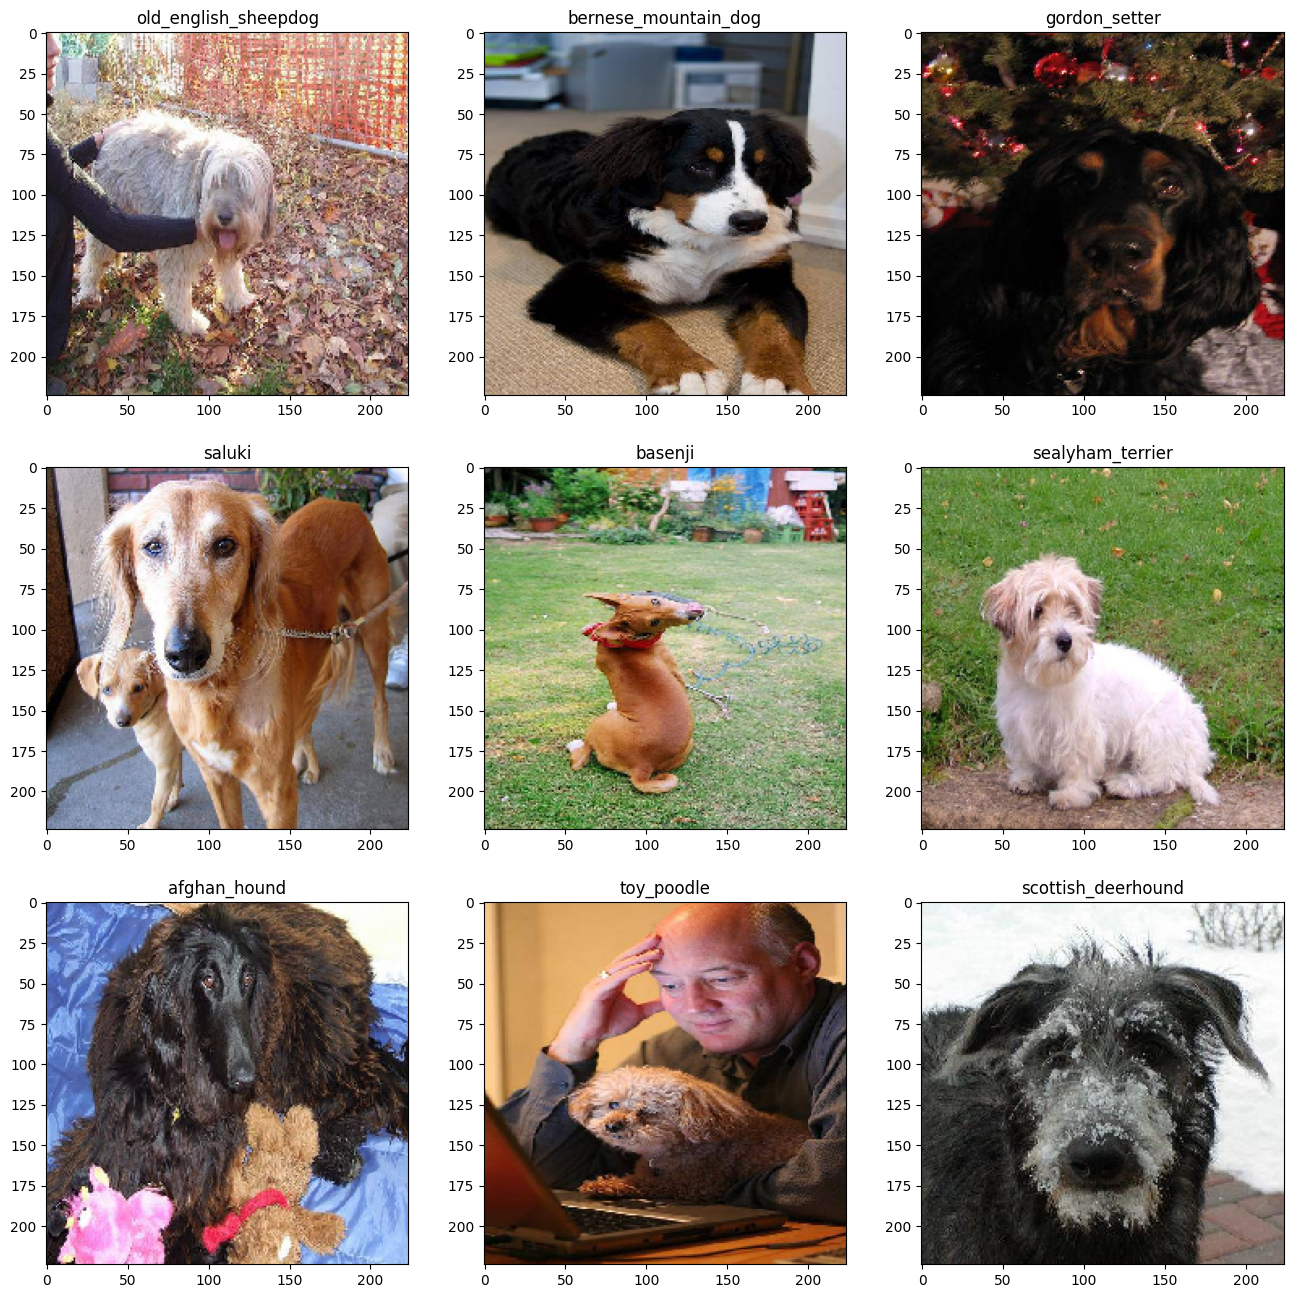

In [20]:
def show_samples(dataset_x, dataset_y):
  fig = plt.figure(figsize=(16,16))
  columns = 3
  rows = 3
  i = 1
  for ik in range(columns*rows):
    img = dataset_x[ik] 
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(img/255.0))
    index = np.argmax(dataset_y[ik])
    plt.title(labels_map_rev[index])
    i += 1
  plt.show()
show_samples(x_train, y_train)

In [21]:
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [22]:
MODEL_N = ''
MODEL = ''
MODEL_PATH = ''
HISTORY_PATH = ''
def rename_model(model):
    global MODEL_N,MODEL, MODEL_PATH, HISTORY_PATH
    MODEL_N = model
    MODEL   = os.path.join(os.getcwd(), 'model')
    MODEL_PATH   = os.path.join(os.getcwd(), 'model', MODEL_N)
    HISTORY_PATH = os.path.join(os.getcwd(), 'history')

    if (not os.path.exists(MODEL)) :
        os.mkdir(MODEL)
    if (not os.path.exists(MODEL_PATH)) :
        os.mkdir(MODEL_PATH)
    if (not os.path.exists(HISTORY_PATH)) :
        os.mkdir(HISTORY_PATH)

    file_name = 'model_' + MODEL_N
    f = open(os.path.join(HISTORY_PATH, file_name + '.csv'), "w")
    f.write("epoch, accuracy, validation_accuracy, loss, validation_loss\n")
    f.close()

In [23]:
class real_time_callback(tf.keras.callbacks.Callback):

    def __init__(self):
        super().__init__()
        self.loss_list = []
        self.val_loss = []
        self.acc_list = []
        self.val_acc = []

    def on_epoch_end(self, epoch, logs={}): 
      self.loss_list.append(logs.get('loss'))
      self.val_loss.append(logs.get('val_loss'))
      self.acc_list.append(logs.get('accuracy'))
      self.val_acc.append(logs.get('val_accuracy'))
      fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

      ax1.plot(self.loss_list)
      ax1.set_title('model loss')
      ax1.set_ylabel('loss')
      ax1.set_xlabel('epoch')
      ax1.plot(self.val_loss)
      ax1.legend(['train', 'val'], loc='upper left')

      ax2.set_title('model accuracy')
      ax2.set_ylabel('accuracy')
      ax2.set_xlabel('epoch')
      ax2.plot(self.acc_list)
      ax2.plot(self.val_acc)
      ax2.legend(['train', 'val'], loc='upper left')
      plt.show()
      file_name = 'model_' + MODEL_N
      f = open(os.path.join(HISTORY_PATH, file_name + '.csv'), "a")
      f.write(str(epoch) + ', ' + str(logs.get('accuracy')) + ", " + str(logs.get('val_accuracy')) + ", " + str(logs.get('loss')) + ", " + str(logs.get('val_loss')) + '\n')
      f.close()
      if (epoch % 10) == 0:
          file_name = 'model_' + MODEL_N + '_' + str(epoch)
          #model.save(os.path.join(MODEL_PATH, file_name))
      if len(self.val_acc) >= 2 and (max(self.val_acc[:-1]) < logs.get('val_accuracy')):
        file_name = 'model_' + MODEL_N + '_BEST'
        model.save(os.path.join(MODEL_PATH, file_name))
        f = open(os.path.join(HISTORY_PATH, file_name + '.txt'), "w")
        f.write("Epoch :" + str(epoch) + "\nLoss : " + str(logs.get('loss')) + "\nAccuracy :" + str(logs.get('accuracy')) + "\nV Loss :" + str(logs.get('val_loss')) + "\nV Accuracy :" + str(logs.get('val_accuracy')))
        f.close()

In [24]:
models_data = [ ['InceptionV3', tf.keras.applications.InceptionV3, tf.keras.applications.inception_v3.preprocess_input],\
               ['Xception', tf.keras.applications.Xception, tf.keras.applications.xception.preprocess_input],
               ['NASNetMobile', tf.keras.applications.NASNetMobile, tf.keras.applications.nasnet.preprocess_input],
               ['InceptionResNetV2', tf.keras.applications.InceptionResNetV2, tf.keras.applications.inception_resnet_v2.preprocess_input],
              ]

In [25]:
models_data = [ ['EfficientNetB0', tf.keras.applications.EfficientNetB0, tf.keras.applications.efficientnet.preprocess_input],\
                
               ['InceptionResNetV2', tf.keras.applications.InceptionResNetV2, tf.keras.applications.inception_resnet_v2.preprocess_input]]

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.math.truediv_1 (TFOpLambda)  (None, 224, 224, 3)  0          ['input_6[0][0]']                
                                                                                                  
 tf.math.subtract_1 (TFOpLambda  (None, 224, 224, 3)  0          ['tf.math.truediv_1[0][0]']      
 )                                                                                                
                                                                                            

2023-04-10 04:52:54.113321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


264/264 [==============================] - ETA: 0s - loss: 4.7284 - accuracy: 0.0866

2023-04-10 04:54:46.623384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


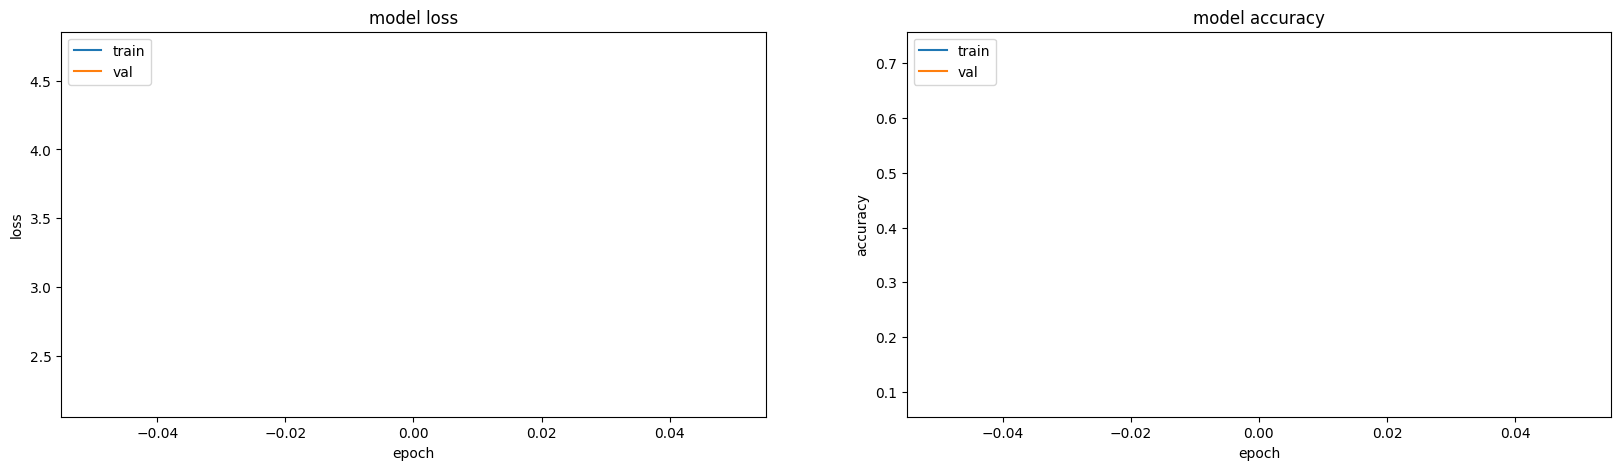

264/264 [==============================] - 152s 531ms/step - loss: 4.7284 - accuracy: 0.0866 - val_loss: 2.1849 - val_accuracy: 0.7256
Epoch 2/50
264/264 [==============================] - ETA: 0s - loss: 4.4875 - accuracy: 0.1222

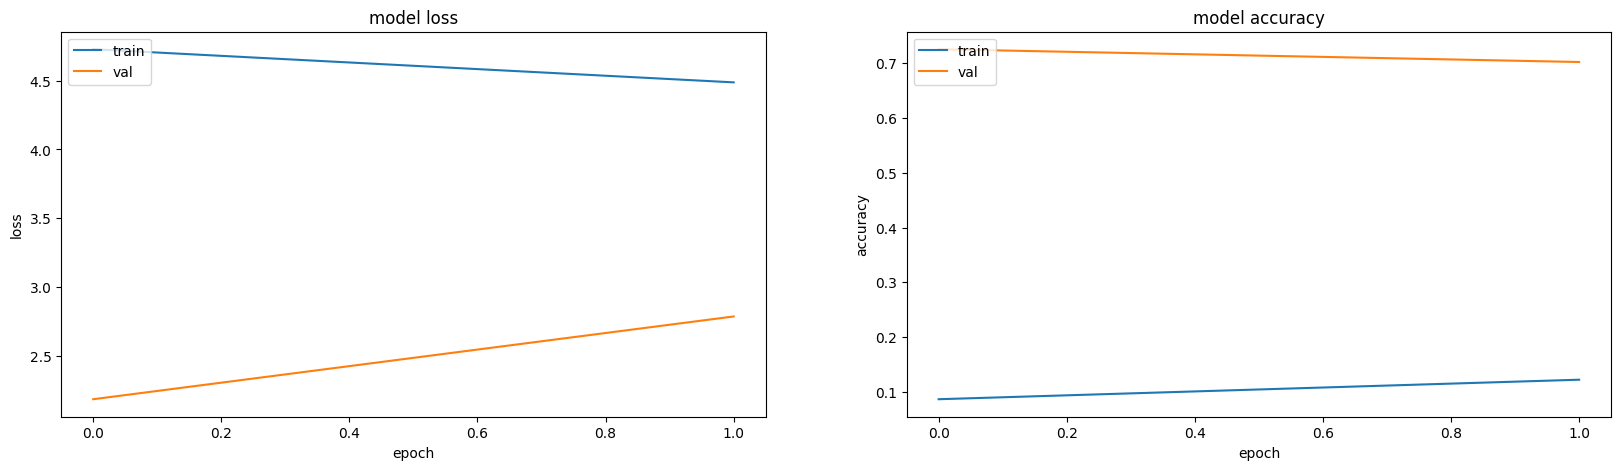

264/264 [==============================] - 120s 453ms/step - loss: 4.4875 - accuracy: 0.1222 - val_loss: 2.7863 - val_accuracy: 0.7022
Epoch 3/50
264/264 [==============================] - ETA: 0s - loss: 4.4307 - accuracy: 0.1286

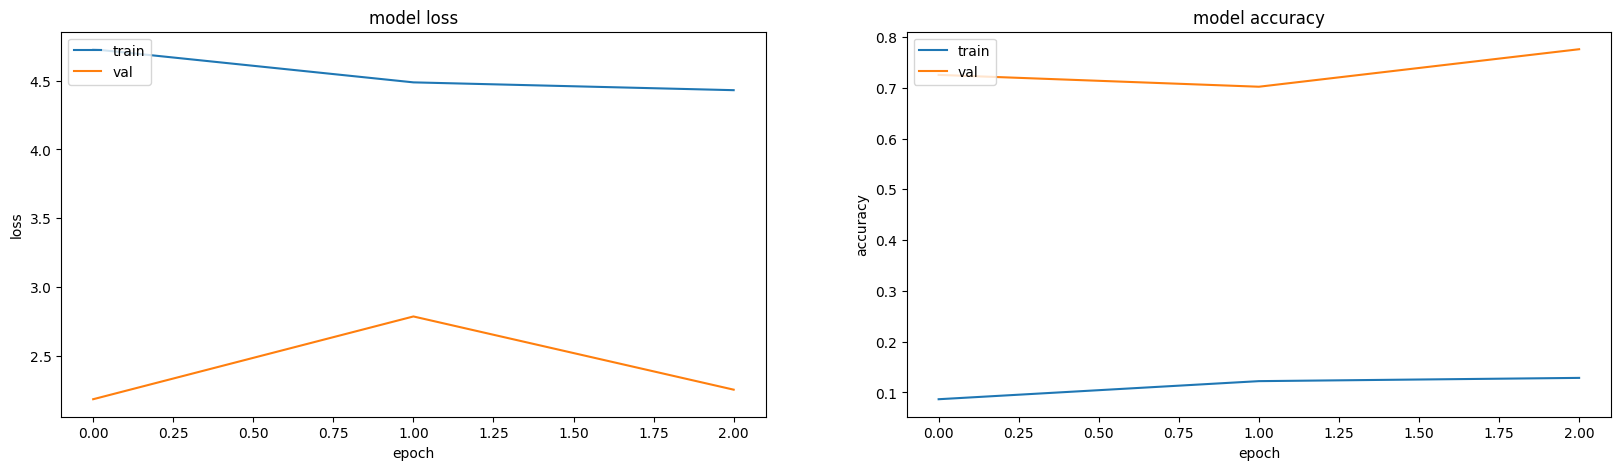

2023-04-10 04:59:37.057879: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/Multi/model_Multi_BEST/assets
264/264 [==============================] - 212s 804ms/step - loss: 4.4307 - accuracy: 0.1286 - val_loss: 2.2543 - val_accuracy: 0.7761
Epoch 4/50
264/264 [==============================] - ETA: 0s - loss: 4.3841 - accuracy: 0.1358

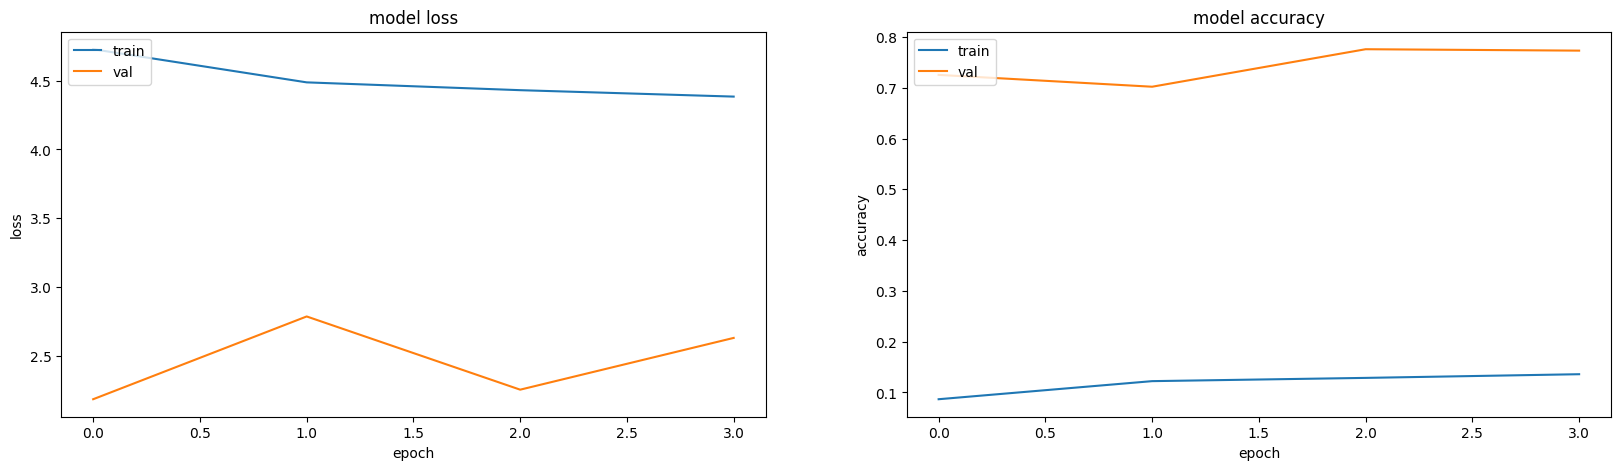

264/264 [==============================] - 118s 447ms/step - loss: 4.3841 - accuracy: 0.1358 - val_loss: 2.6304 - val_accuracy: 0.7733
Epoch 5/50
264/264 [==============================] - ETA: 0s - loss: 4.3812 - accuracy: 0.1396

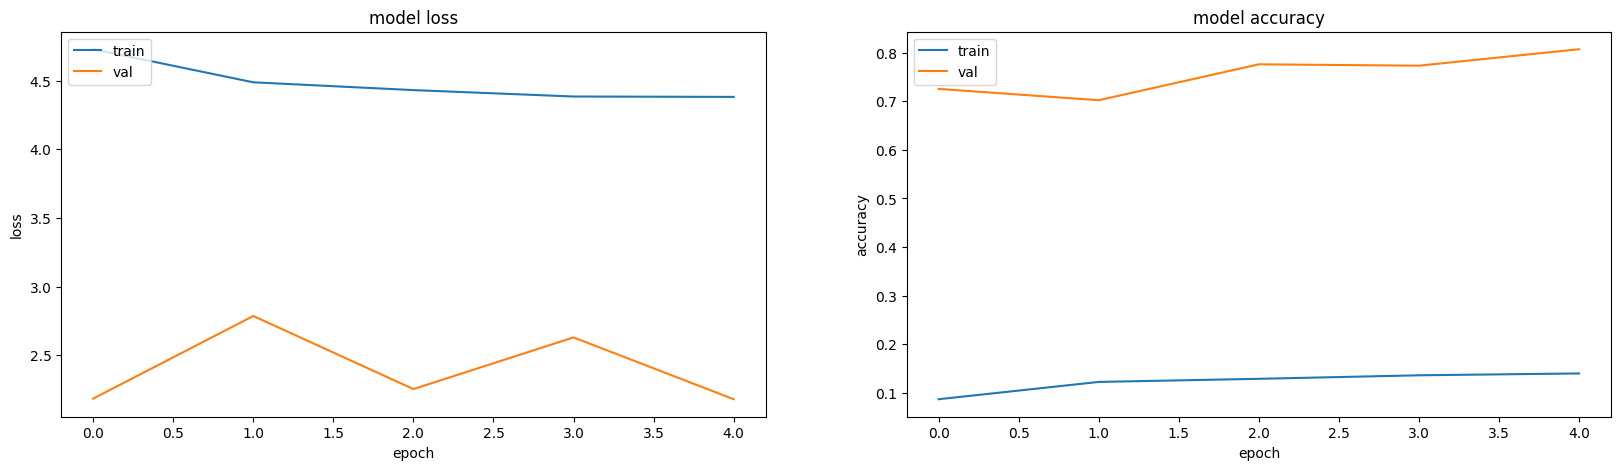

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/Multi/model_Multi_BEST/assets
264/264 [==============================] - 217s 825ms/step - loss: 4.3812 - accuracy: 0.1396 - val_loss: 2.1805 - val_accuracy: 0.8072
Epoch 6/50
264/264 [==============================] - ETA: 0s - loss: 4.3224 - accuracy: 0.1446

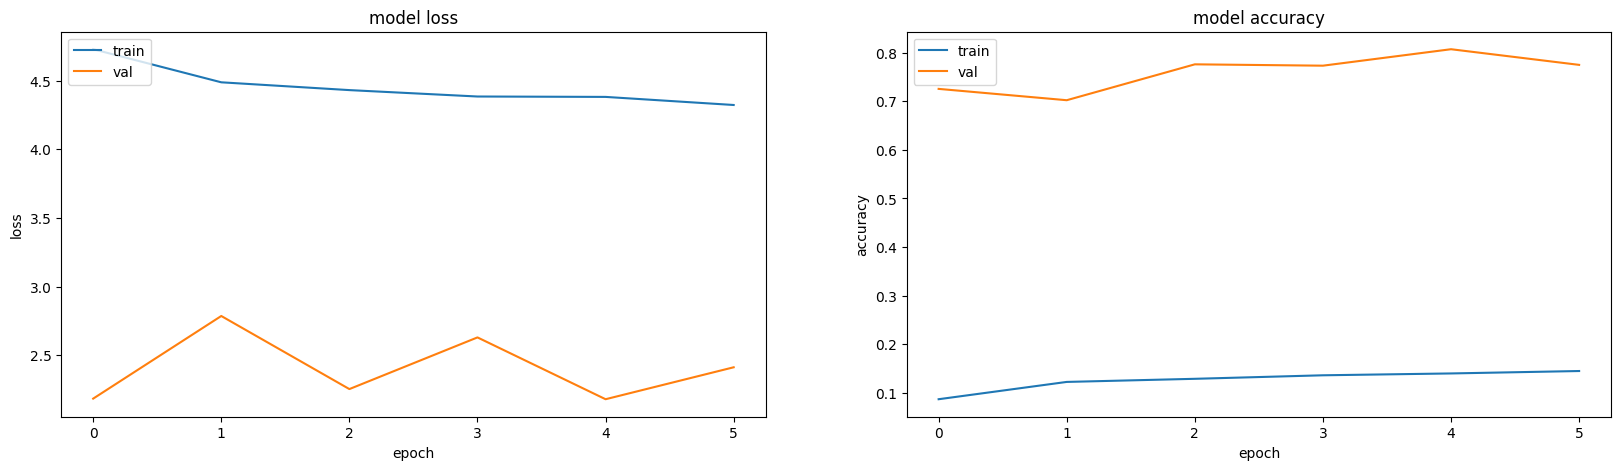

264/264 [==============================] - 118s 448ms/step - loss: 4.3224 - accuracy: 0.1446 - val_loss: 2.4130 - val_accuracy: 0.7750
Epoch 7/50
264/264 [==============================] - ETA: 0s - loss: 4.3151 - accuracy: 0.1445

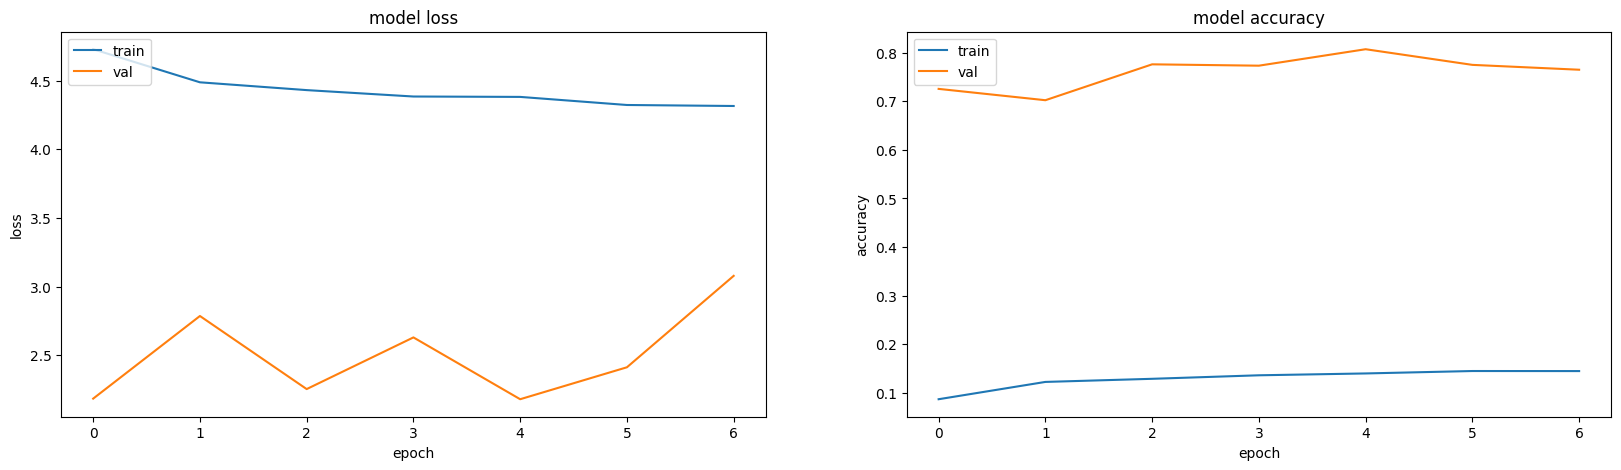

264/264 [==============================] - 118s 447ms/step - loss: 4.3151 - accuracy: 0.1445 - val_loss: 3.0785 - val_accuracy: 0.7650
Epoch 8/50
264/264 [==============================] - ETA: 0s - loss: 4.3320 - accuracy: 0.1438

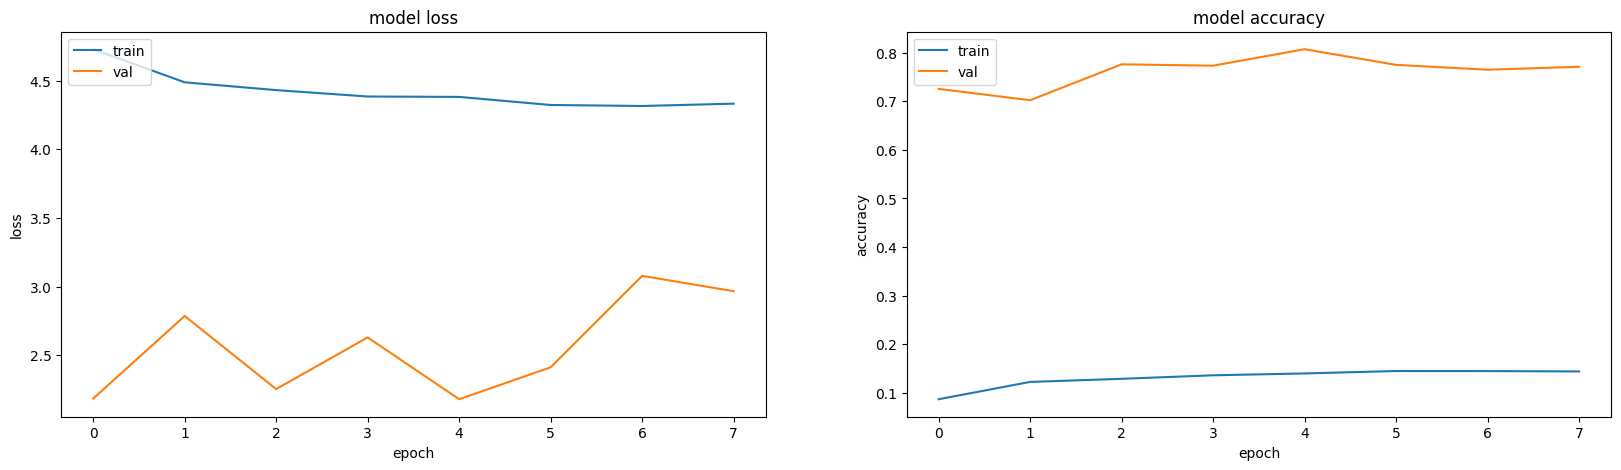

264/264 [==============================] - 118s 448ms/step - loss: 4.3320 - accuracy: 0.1438 - val_loss: 2.9668 - val_accuracy: 0.7711
Epoch 9/50
264/264 [==============================] - ETA: 0s - loss: 4.3137 - accuracy: 0.1463

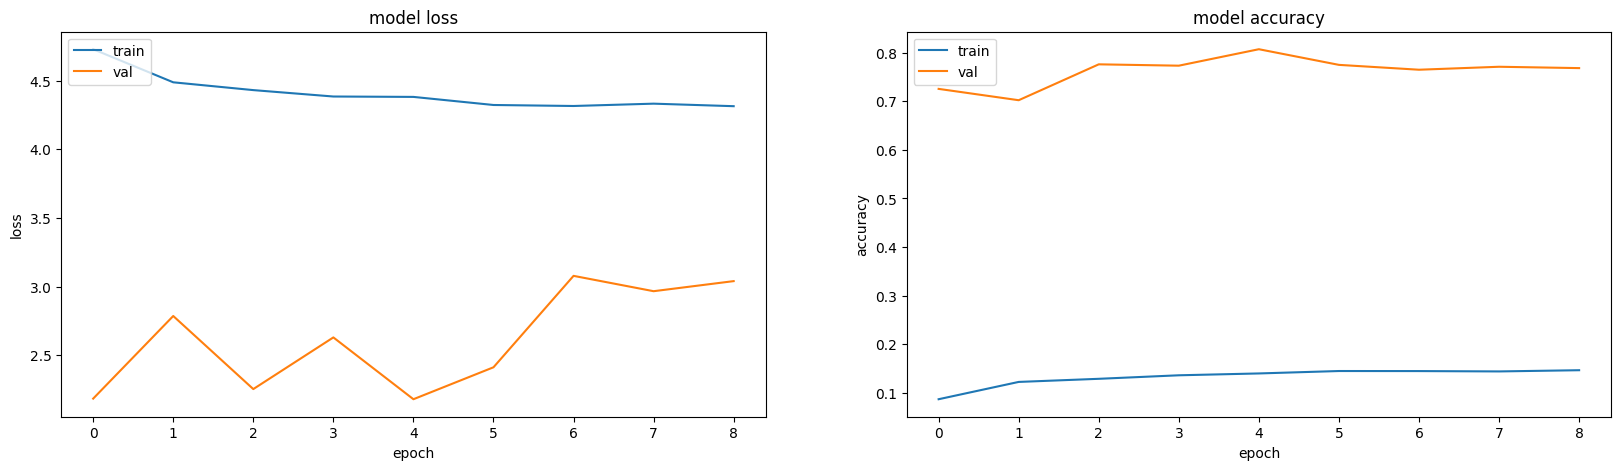

264/264 [==============================] - 118s 446ms/step - loss: 4.3137 - accuracy: 0.1463 - val_loss: 3.0402 - val_accuracy: 0.7683
Epoch 10/50
264/264 [==============================] - ETA: 0s - loss: 4.3285 - accuracy: 0.1472

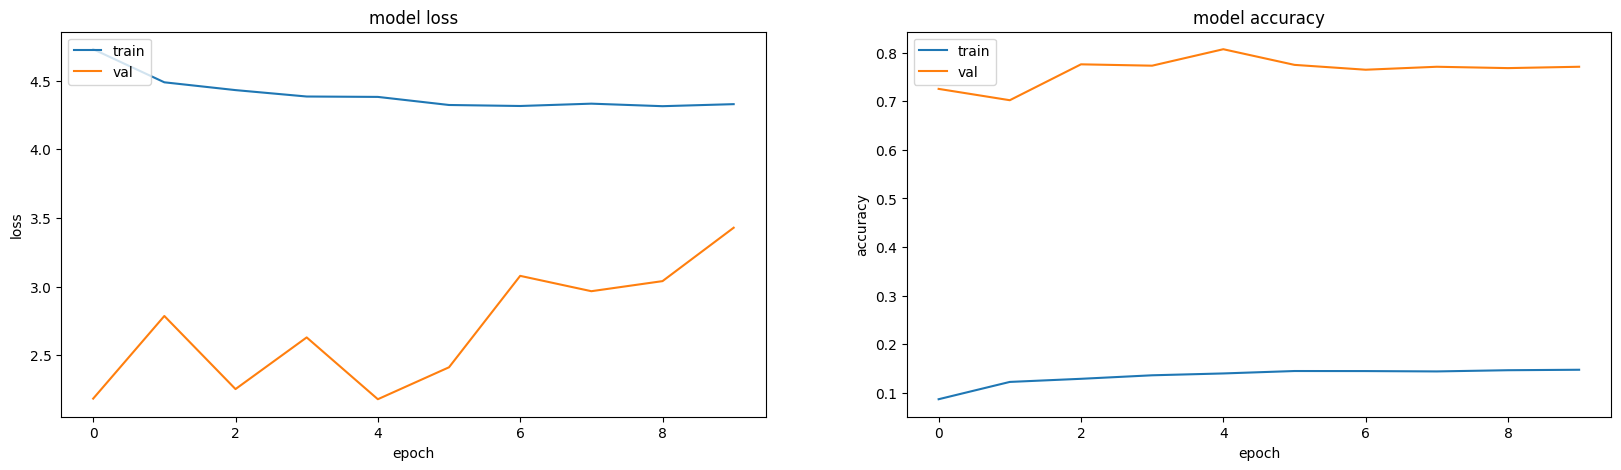

264/264 [==============================] - 117s 445ms/step - loss: 4.3285 - accuracy: 0.1472 - val_loss: 3.4290 - val_accuracy: 0.7711
Epoch 11/50
264/264 [==============================] - ETA: 0s - loss: 4.3251 - accuracy: 0.1471

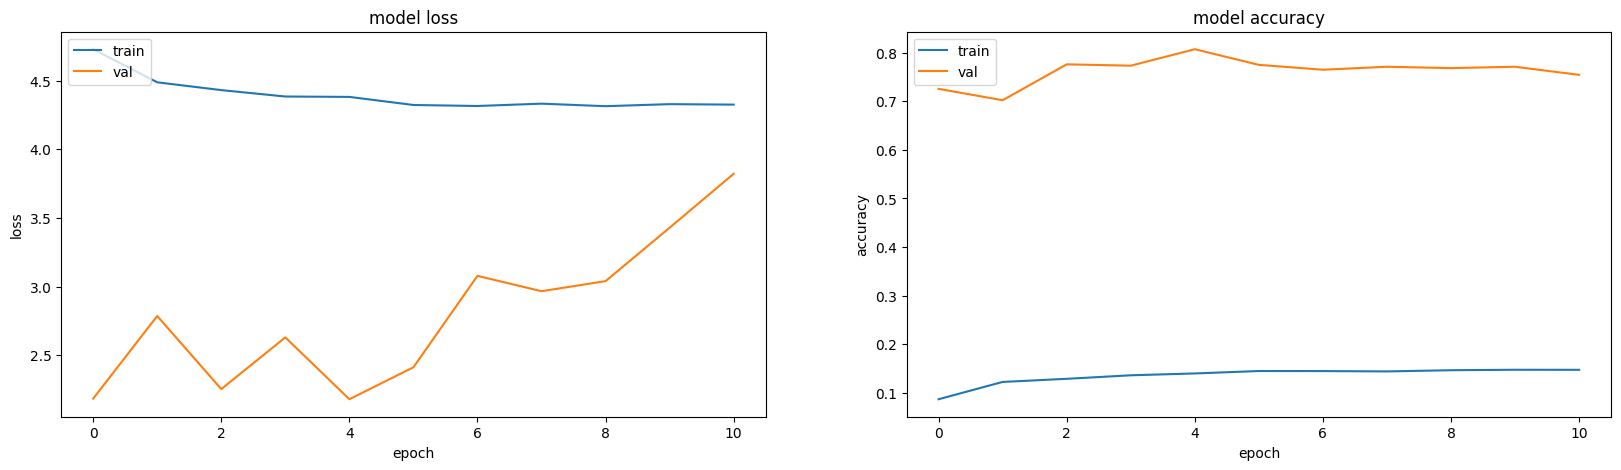

264/264 [==============================] - 118s 449ms/step - loss: 4.3251 - accuracy: 0.1471 - val_loss: 3.8217 - val_accuracy: 0.7544
Epoch 12/50
264/264 [==============================] - ETA: 0s - loss: 4.3097 - accuracy: 0.1489

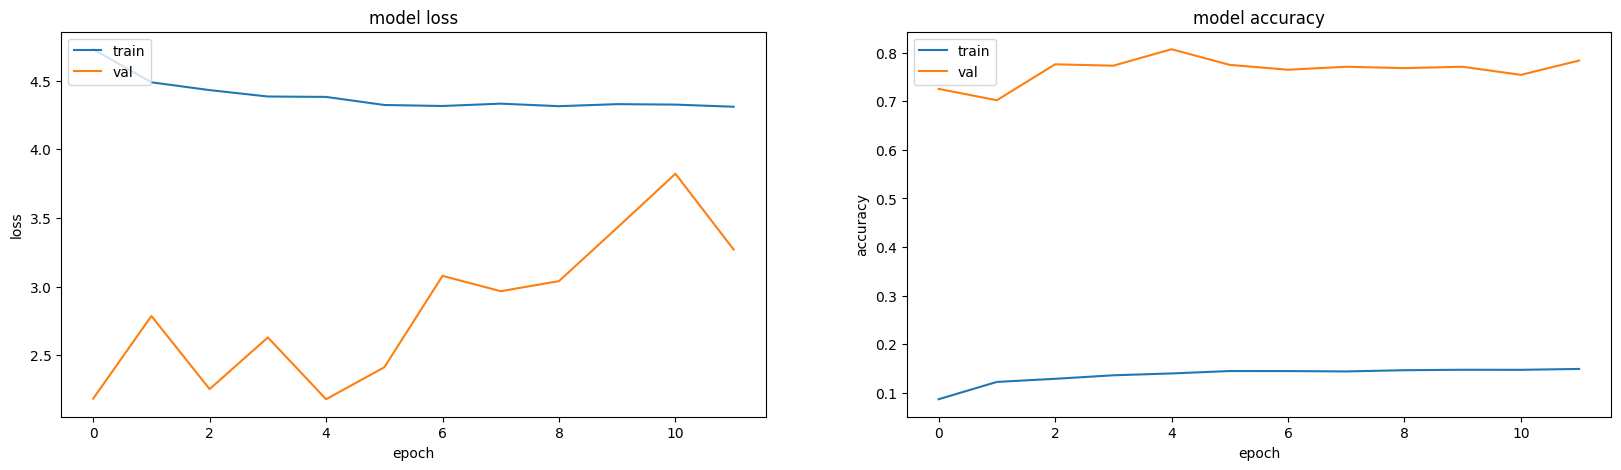

264/264 [==============================] - 118s 446ms/step - loss: 4.3097 - accuracy: 0.1489 - val_loss: 3.2697 - val_accuracy: 0.7839
Epoch 13/50
264/264 [==============================] - ETA: 0s - loss: 4.2794 - accuracy: 0.1500

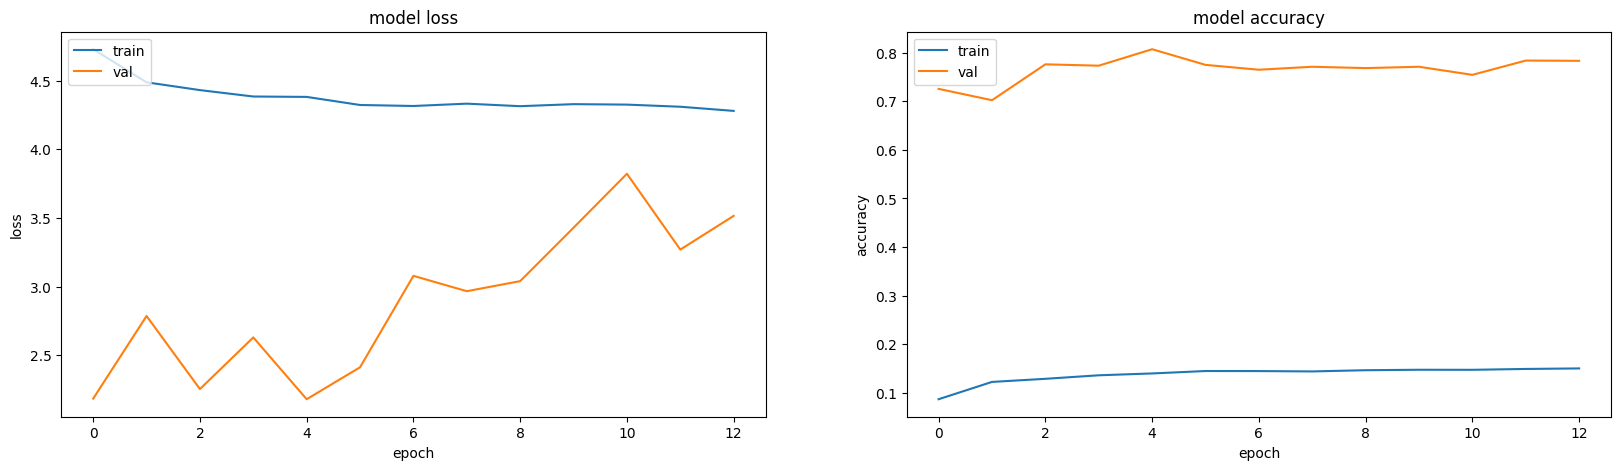

264/264 [==============================] - 119s 450ms/step - loss: 4.2794 - accuracy: 0.1500 - val_loss: 3.5153 - val_accuracy: 0.7833
Epoch 14/50
264/264 [==============================] - ETA: 0s - loss: 4.3312 - accuracy: 0.1471

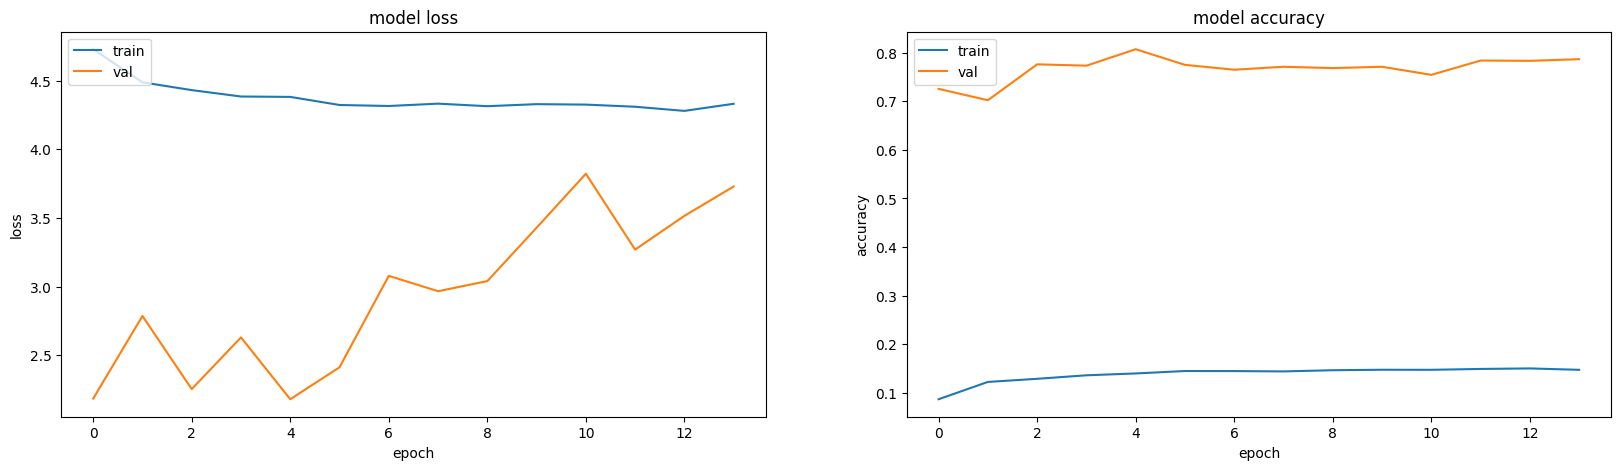

264/264 [==============================] - 118s 446ms/step - loss: 4.3312 - accuracy: 0.1471 - val_loss: 3.7289 - val_accuracy: 0.7867
Epoch 15/50
264/264 [==============================] - ETA: 0s - loss: 4.2990 - accuracy: 0.1507

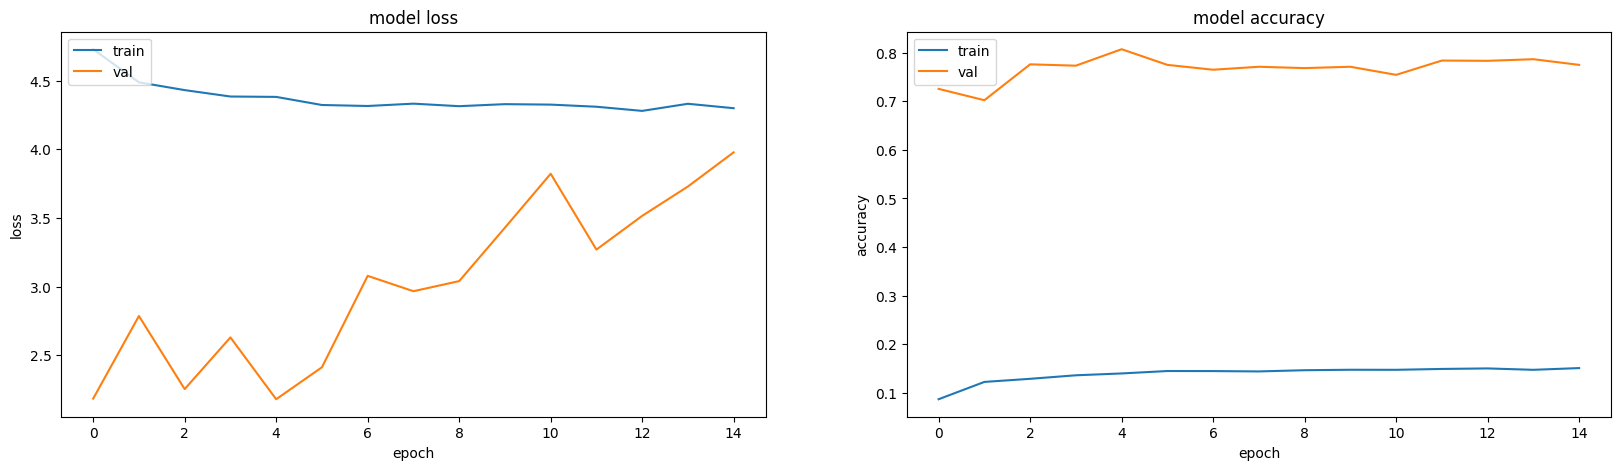

264/264 [==============================] - 118s 446ms/step - loss: 4.2990 - accuracy: 0.1507 - val_loss: 3.9779 - val_accuracy: 0.7750
Epoch 16/50
264/264 [==============================] - ETA: 0s - loss: 4.3013 - accuracy: 0.1510

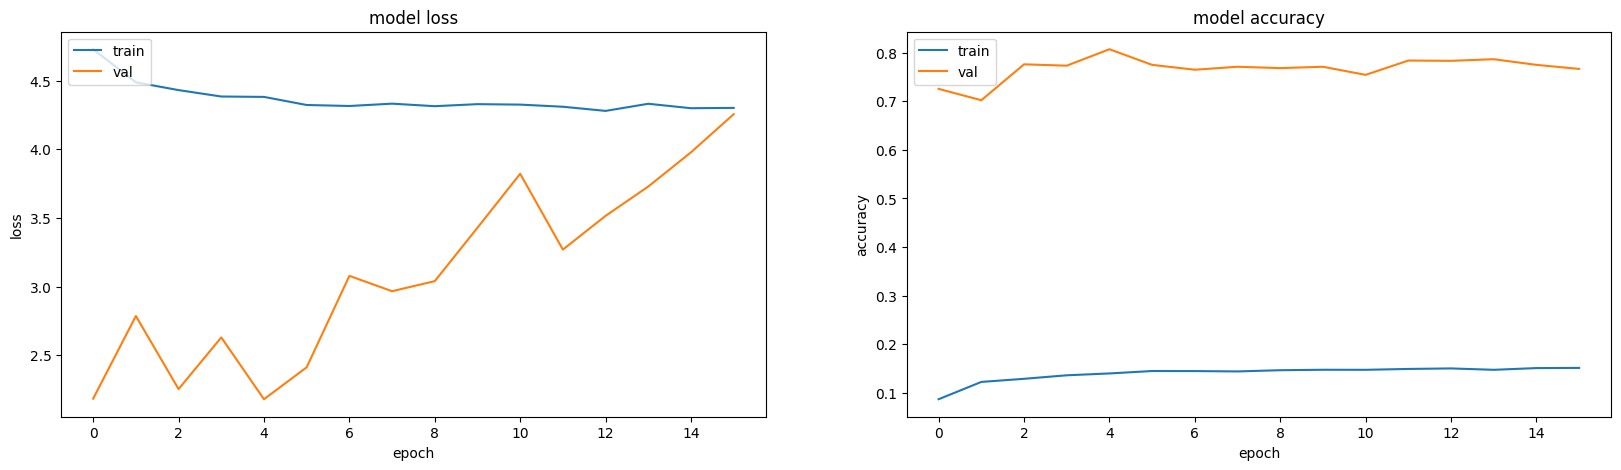

264/264 [==============================] - 118s 446ms/step - loss: 4.3013 - accuracy: 0.1510 - val_loss: 4.2555 - val_accuracy: 0.7667
Epoch 17/50
264/264 [==============================] - ETA: 0s - loss: 4.2778 - accuracy: 0.1535

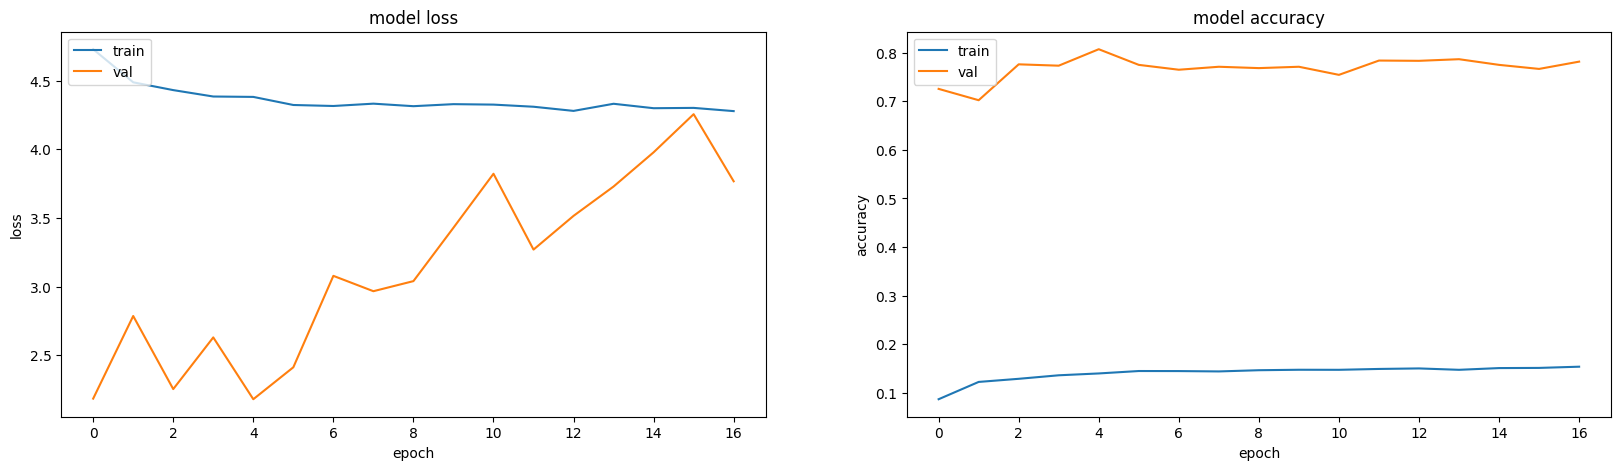

264/264 [==============================] - 117s 444ms/step - loss: 4.2778 - accuracy: 0.1535 - val_loss: 3.7669 - val_accuracy: 0.7817
Epoch 18/50
264/264 [==============================] - ETA: 0s - loss: 4.3126 - accuracy: 0.1514

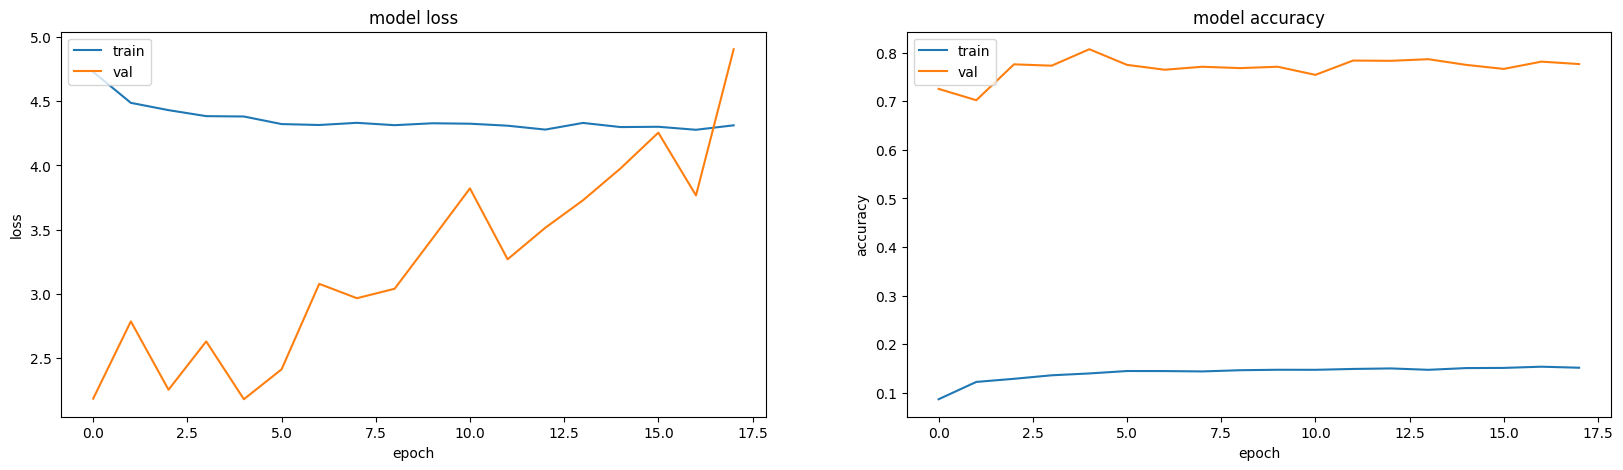

264/264 [==============================] - 117s 445ms/step - loss: 4.3126 - accuracy: 0.1514 - val_loss: 4.9049 - val_accuracy: 0.7767
Epoch 19/50
264/264 [==============================] - ETA: 0s - loss: 4.2766 - accuracy: 0.1516

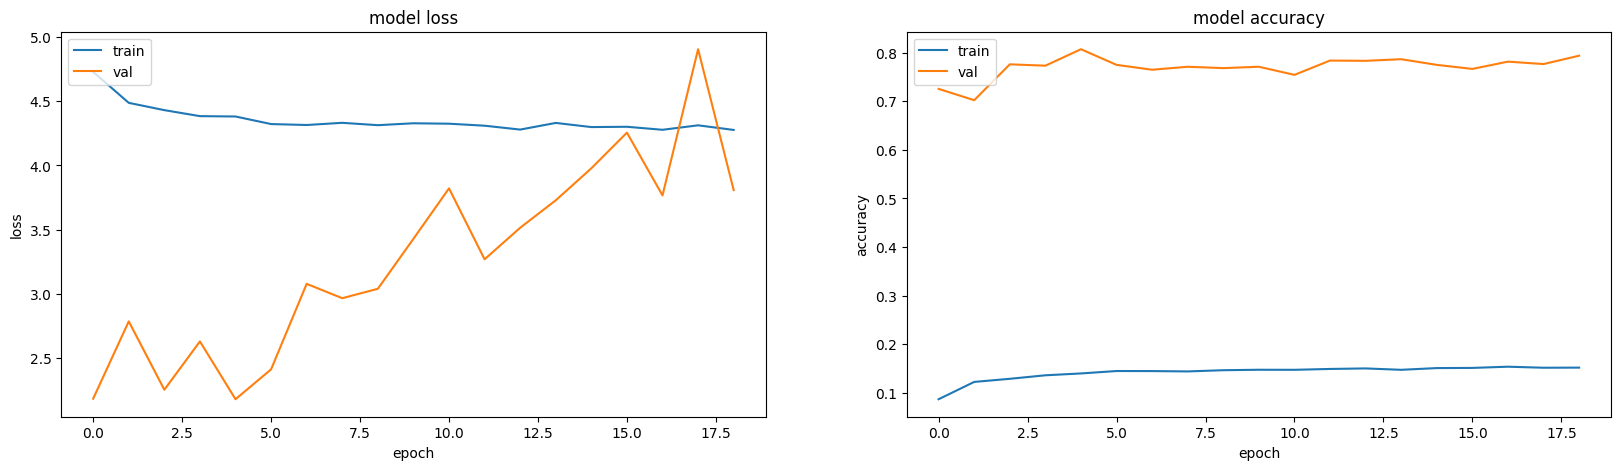

264/264 [==============================] - 117s 444ms/step - loss: 4.2766 - accuracy: 0.1516 - val_loss: 3.8082 - val_accuracy: 0.7939
Epoch 20/50
264/264 [==============================] - ETA: 0s - loss: 4.3620 - accuracy: 0.1490

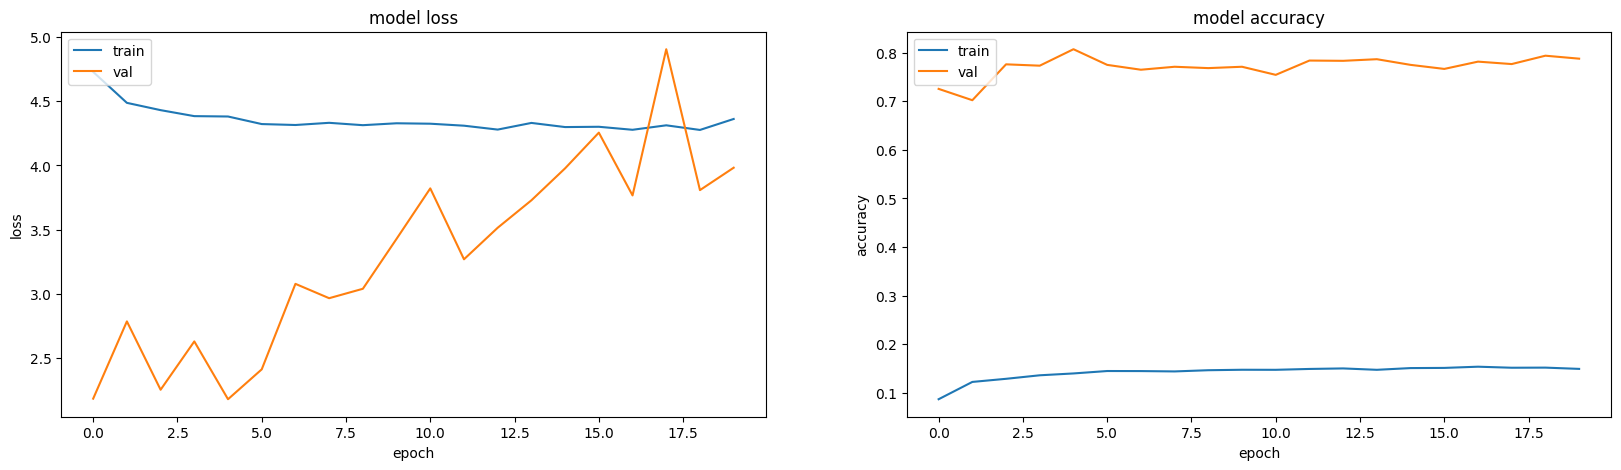

264/264 [==============================] - 118s 446ms/step - loss: 4.3620 - accuracy: 0.1490 - val_loss: 3.9826 - val_accuracy: 0.7878
Epoch 21/50
264/264 [==============================] - ETA: 0s - loss: 4.2868 - accuracy: 0.1508

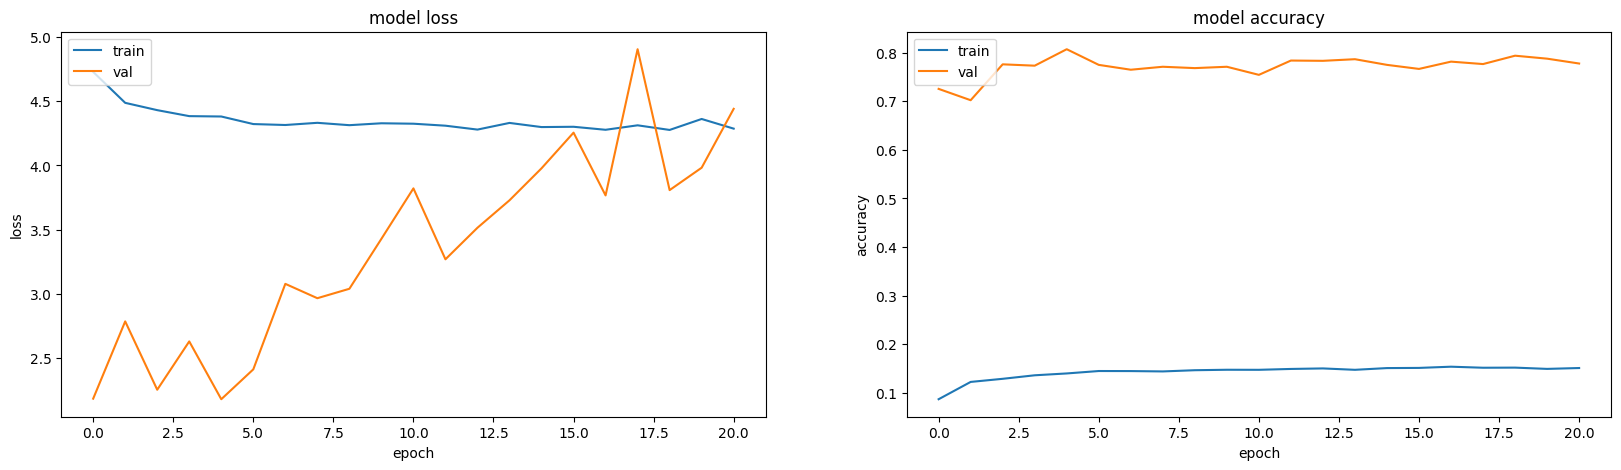

264/264 [==============================] - 117s 445ms/step - loss: 4.2868 - accuracy: 0.1508 - val_loss: 4.4408 - val_accuracy: 0.7778
Epoch 22/50
264/264 [==============================] - ETA: 0s - loss: 4.3027 - accuracy: 0.1498

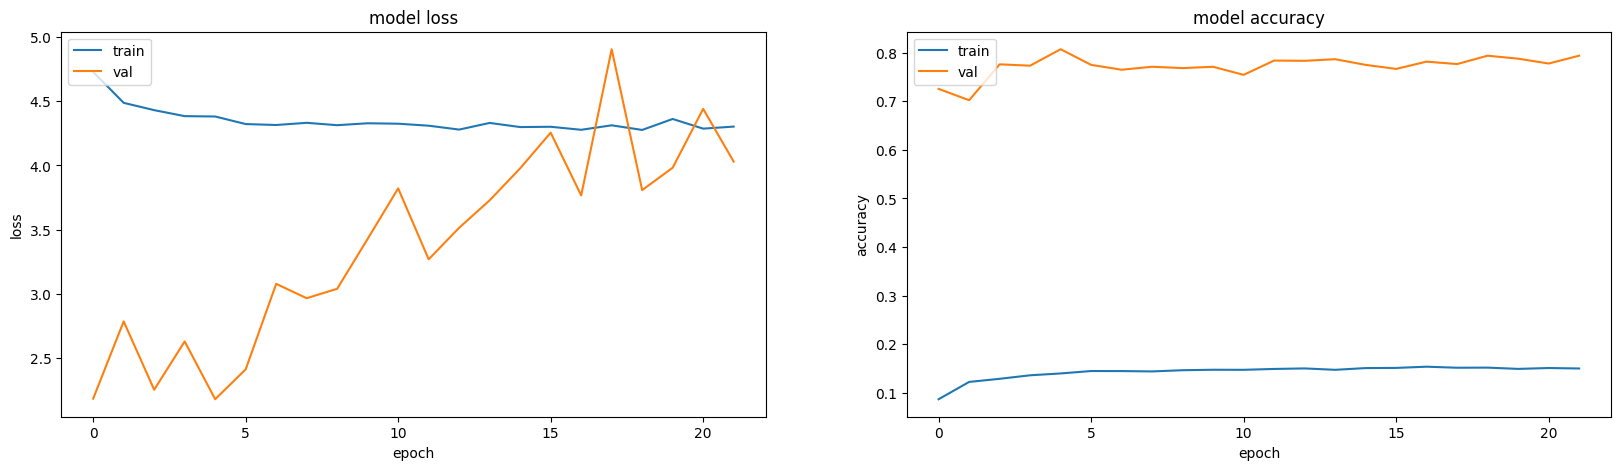

264/264 [==============================] - 117s 445ms/step - loss: 4.3027 - accuracy: 0.1498 - val_loss: 4.0301 - val_accuracy: 0.7939
Epoch 23/50
264/264 [==============================] - ETA: 0s - loss: 4.2982 - accuracy: 0.1516

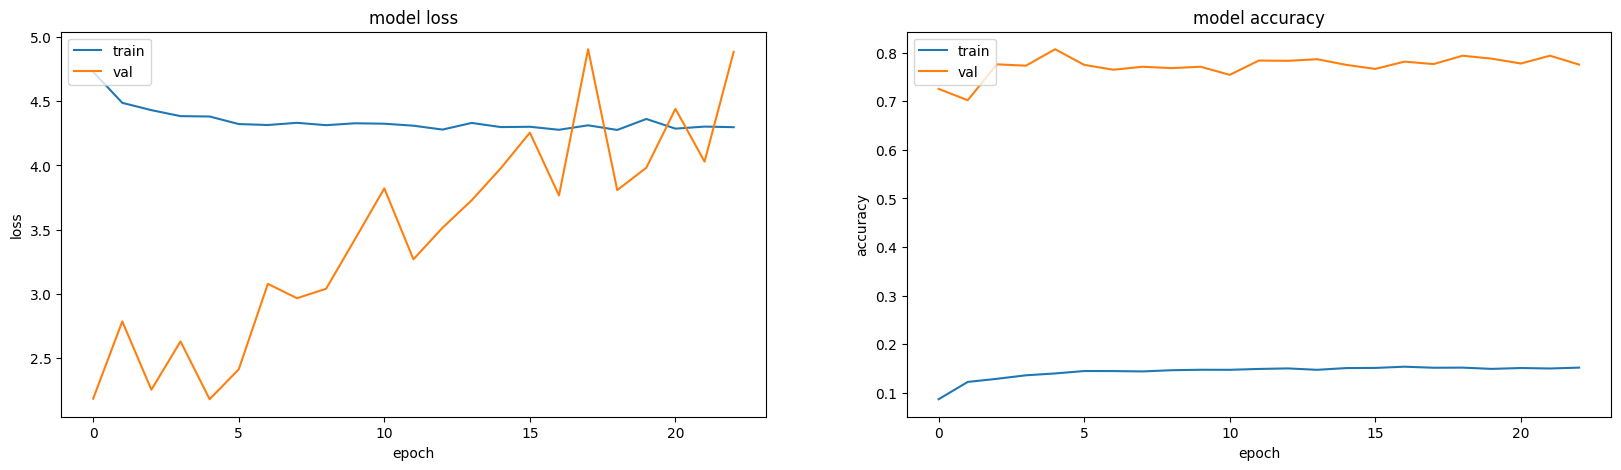

264/264 [==============================] - 117s 445ms/step - loss: 4.2982 - accuracy: 0.1516 - val_loss: 4.8845 - val_accuracy: 0.7756
Epoch 24/50
264/264 [==============================] - ETA: 0s - loss: 4.2936 - accuracy: 0.1526

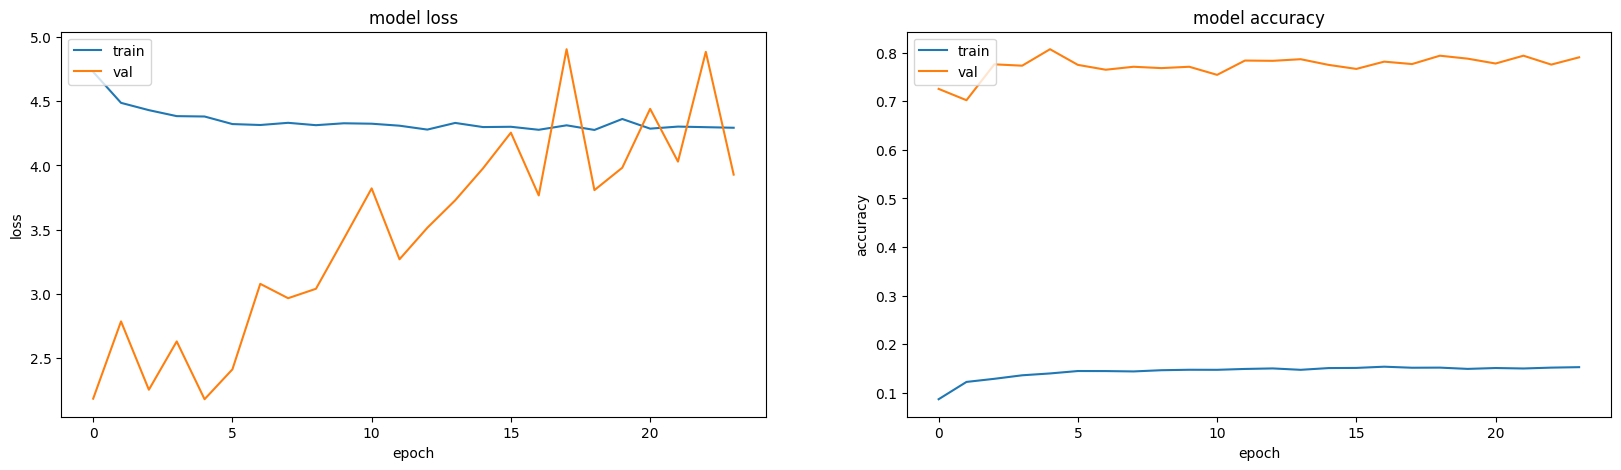

264/264 [==============================] - 117s 444ms/step - loss: 4.2936 - accuracy: 0.1526 - val_loss: 3.9289 - val_accuracy: 0.7906
Epoch 25/50
264/264 [==============================] - ETA: 0s - loss: 4.2918 - accuracy: 0.1514

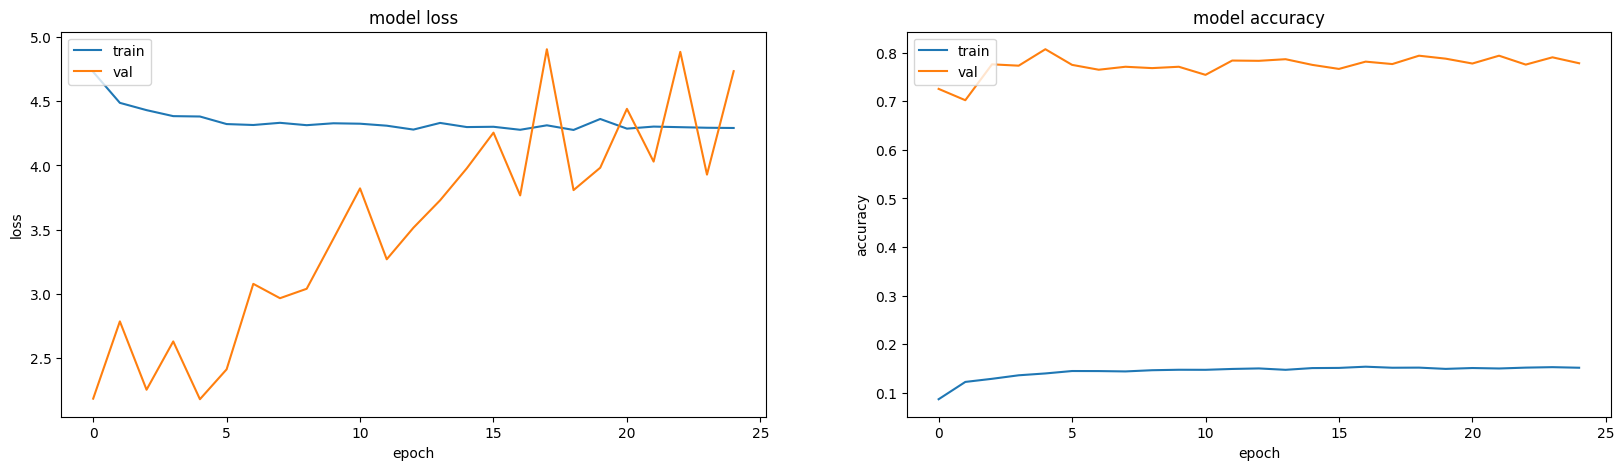

264/264 [==============================] - 117s 444ms/step - loss: 4.2918 - accuracy: 0.1514 - val_loss: 4.7343 - val_accuracy: 0.7783
Epoch 26/50
264/264 [==============================] - ETA: 0s - loss: 4.2753 - accuracy: 0.1529

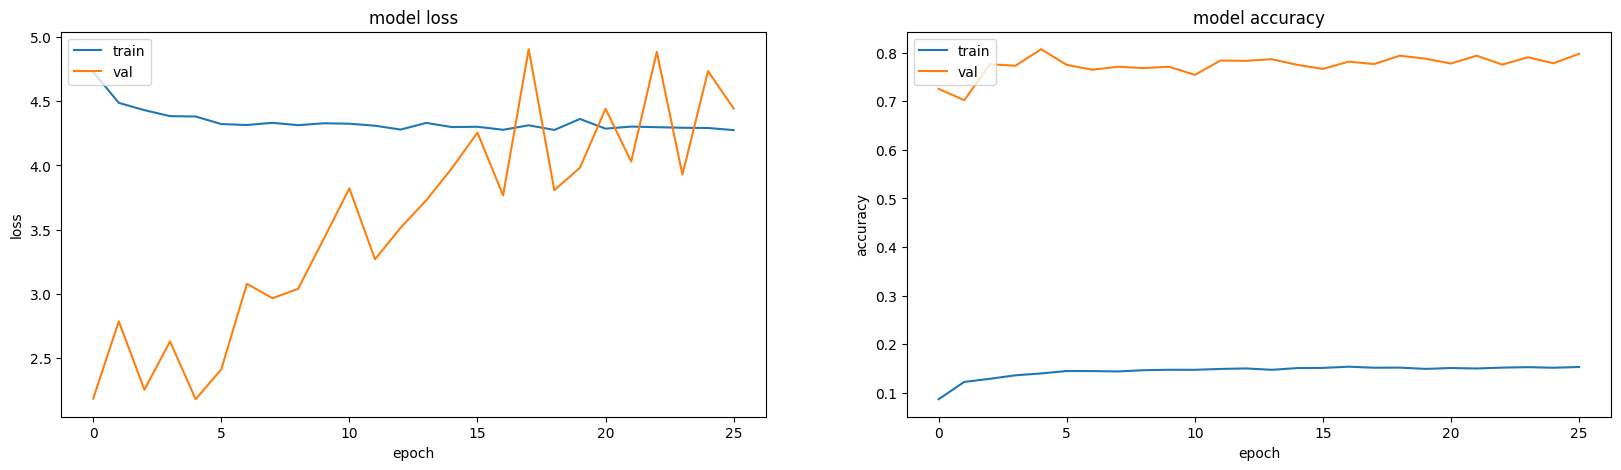

264/264 [==============================] - 117s 444ms/step - loss: 4.2753 - accuracy: 0.1529 - val_loss: 4.4430 - val_accuracy: 0.7978
Epoch 27/50
264/264 [==============================] - ETA: 0s - loss: 4.2956 - accuracy: 0.1503

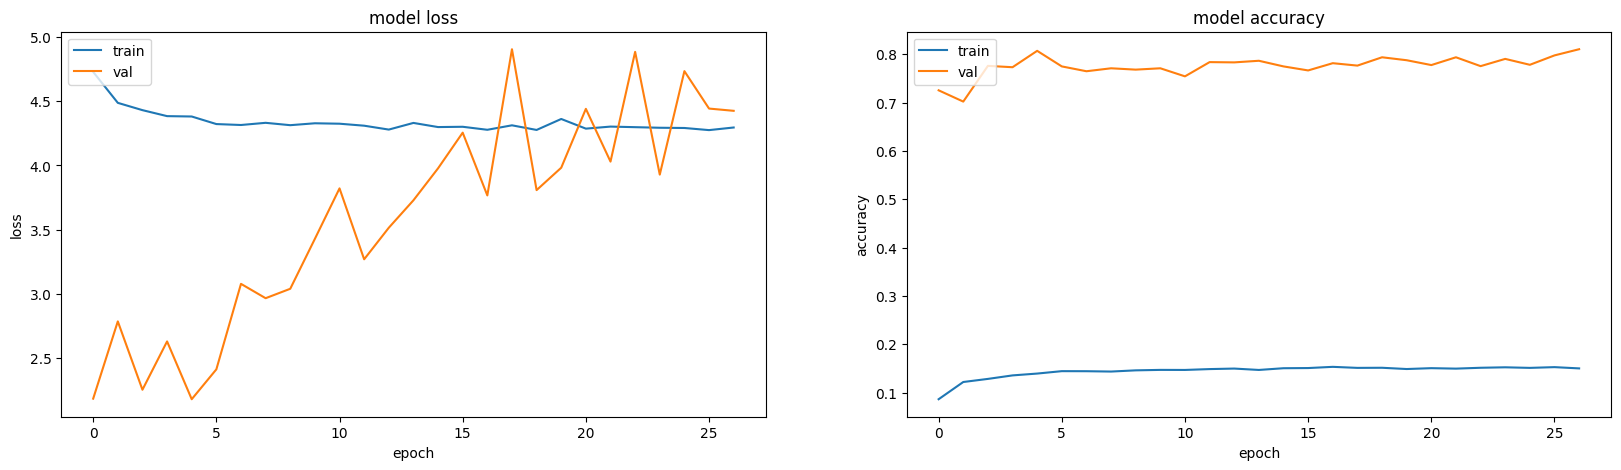

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/Multi/model_Multi_BEST/assets
264/264 [==============================] - 215s 817ms/step - loss: 4.2956 - accuracy: 0.1503 - val_loss: 4.4255 - val_accuracy: 0.8106
Epoch 28/50
264/264 [==============================] - ETA: 0s - loss: 4.3070 - accuracy: 0.1500

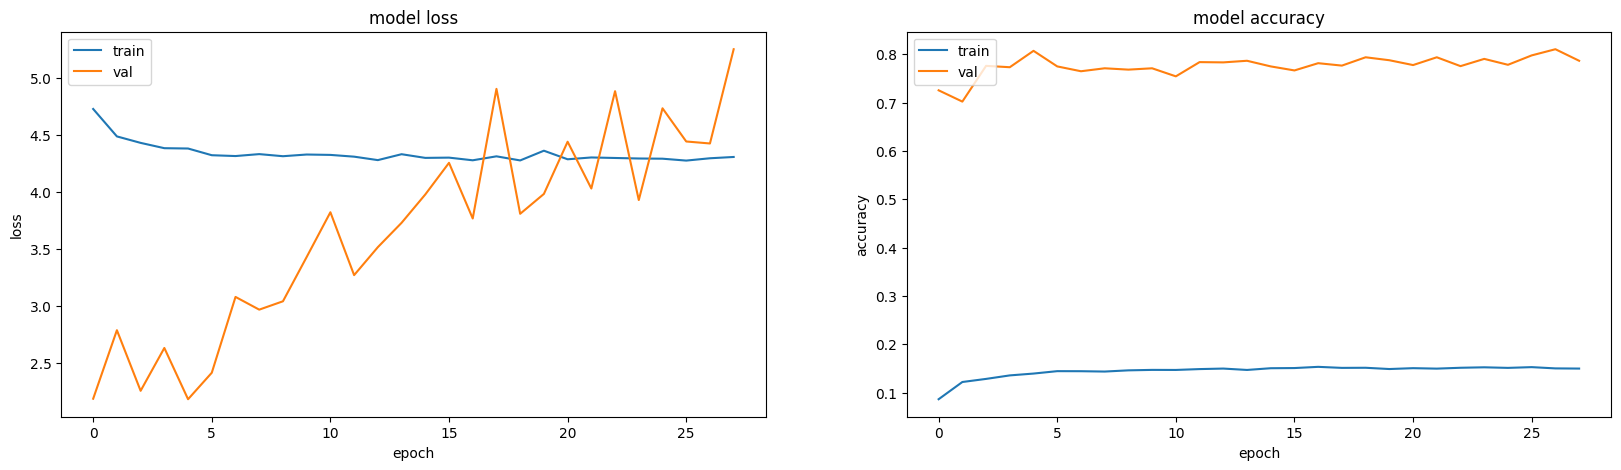

264/264 [==============================] - 117s 444ms/step - loss: 4.3070 - accuracy: 0.1500 - val_loss: 5.2528 - val_accuracy: 0.7867
Epoch 29/50
264/264 [==============================] - ETA: 0s - loss: 4.2814 - accuracy: 0.1517

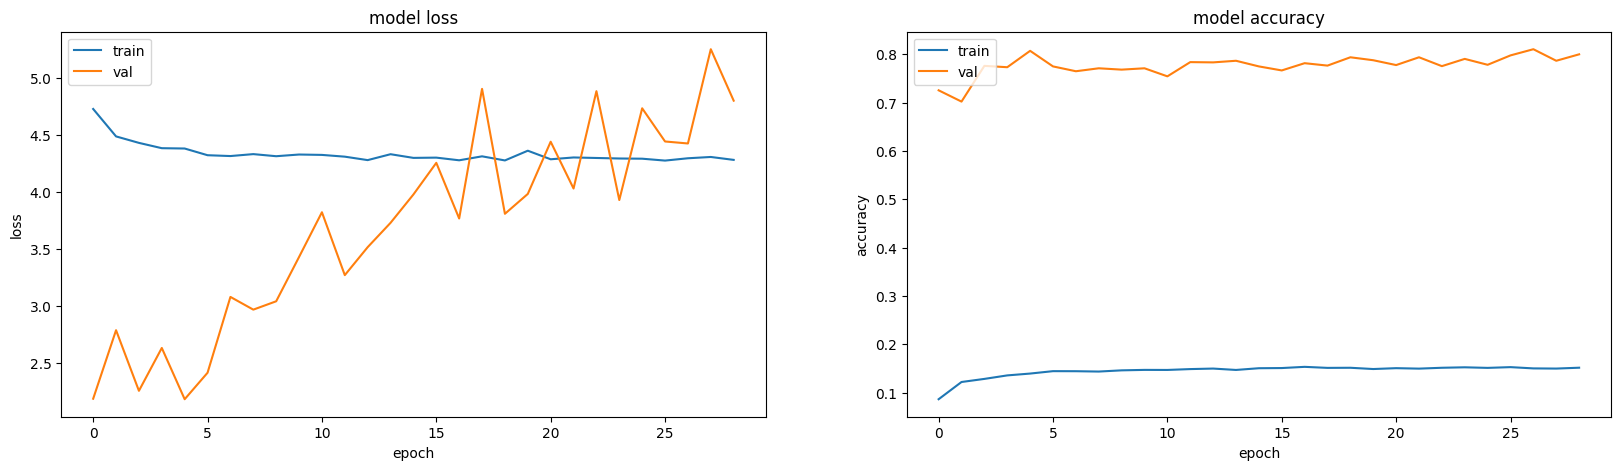

264/264 [==============================] - 117s 444ms/step - loss: 4.2814 - accuracy: 0.1517 - val_loss: 4.8013 - val_accuracy: 0.8000
Epoch 30/50
264/264 [==============================] - ETA: 0s - loss: 4.3128 - accuracy: 0.1507

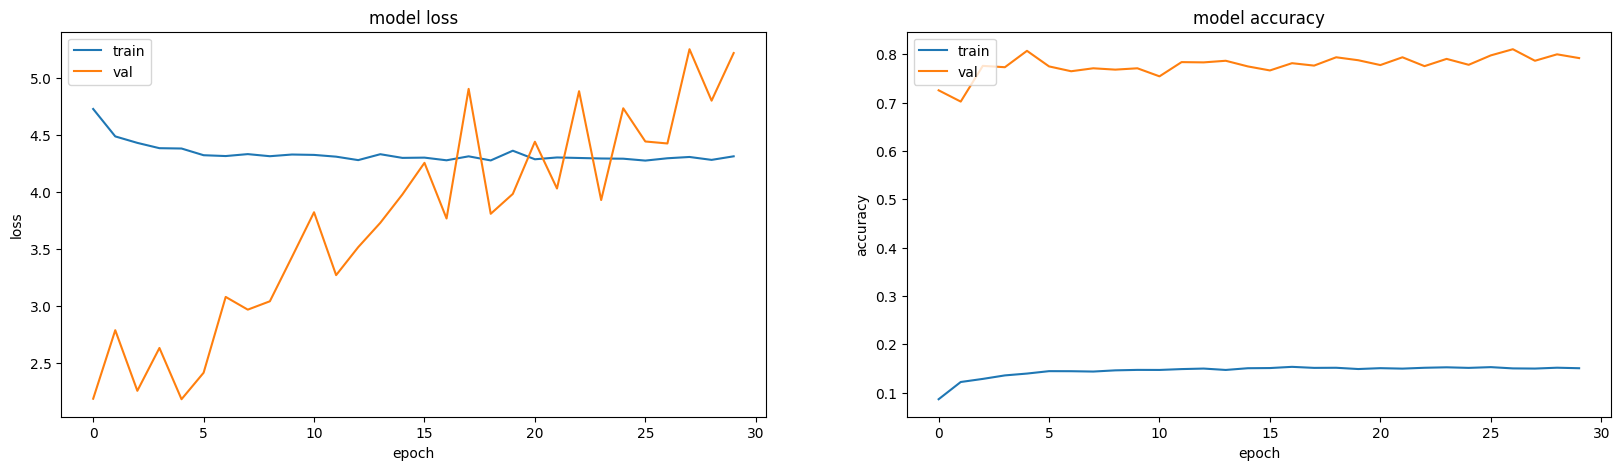

264/264 [==============================] - 117s 444ms/step - loss: 4.3128 - accuracy: 0.1507 - val_loss: 5.2194 - val_accuracy: 0.7922
Epoch 31/50
264/264 [==============================] - ETA: 0s - loss: 4.3130 - accuracy: 0.1521

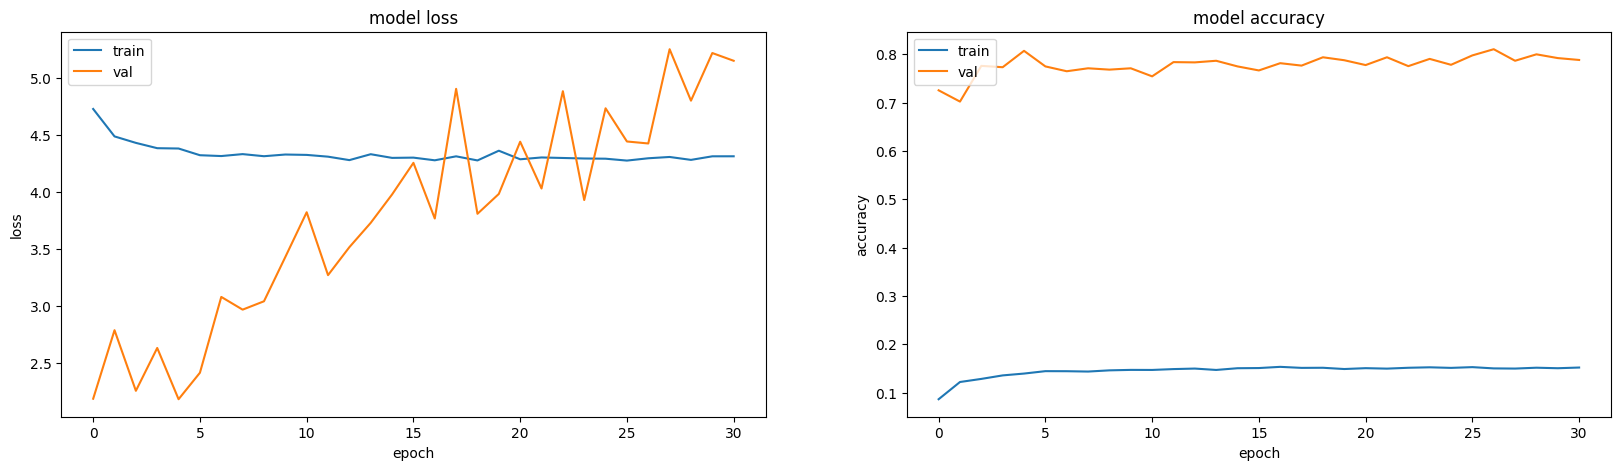

264/264 [==============================] - 117s 444ms/step - loss: 4.3130 - accuracy: 0.1521 - val_loss: 5.1514 - val_accuracy: 0.7883
Epoch 32/50
264/264 [==============================] - ETA: 0s - loss: 4.2898 - accuracy: 0.1512

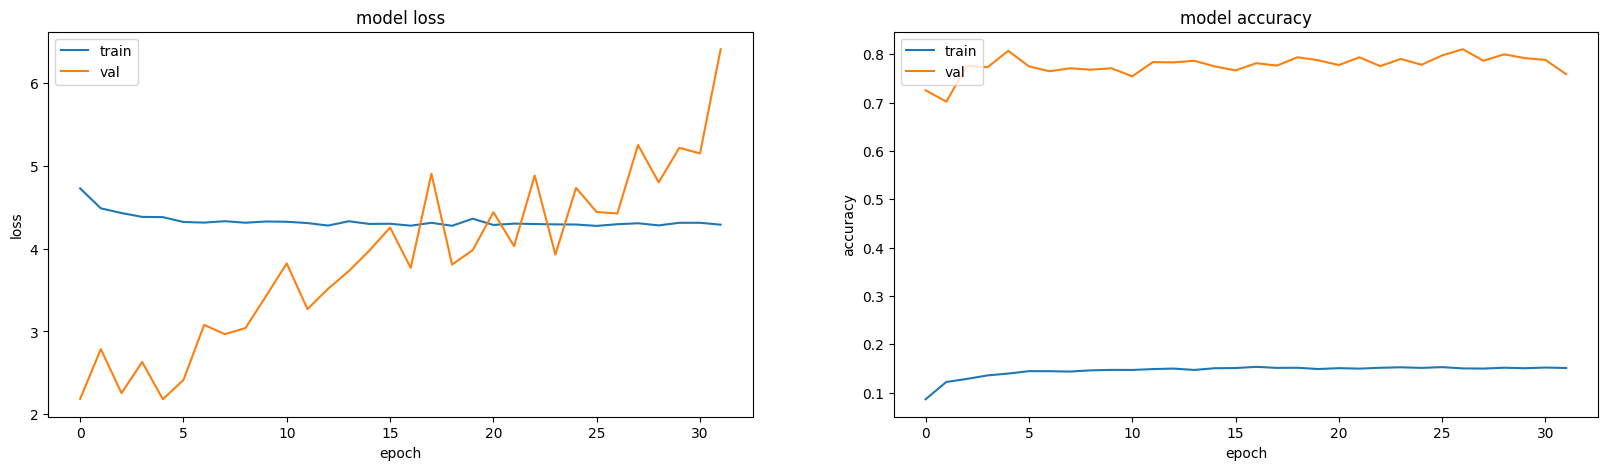

264/264 [==============================] - 117s 444ms/step - loss: 4.2898 - accuracy: 0.1512 - val_loss: 6.4106 - val_accuracy: 0.7589
Epoch 33/50
264/264 [==============================] - ETA: 0s - loss: 4.3444 - accuracy: 0.1512

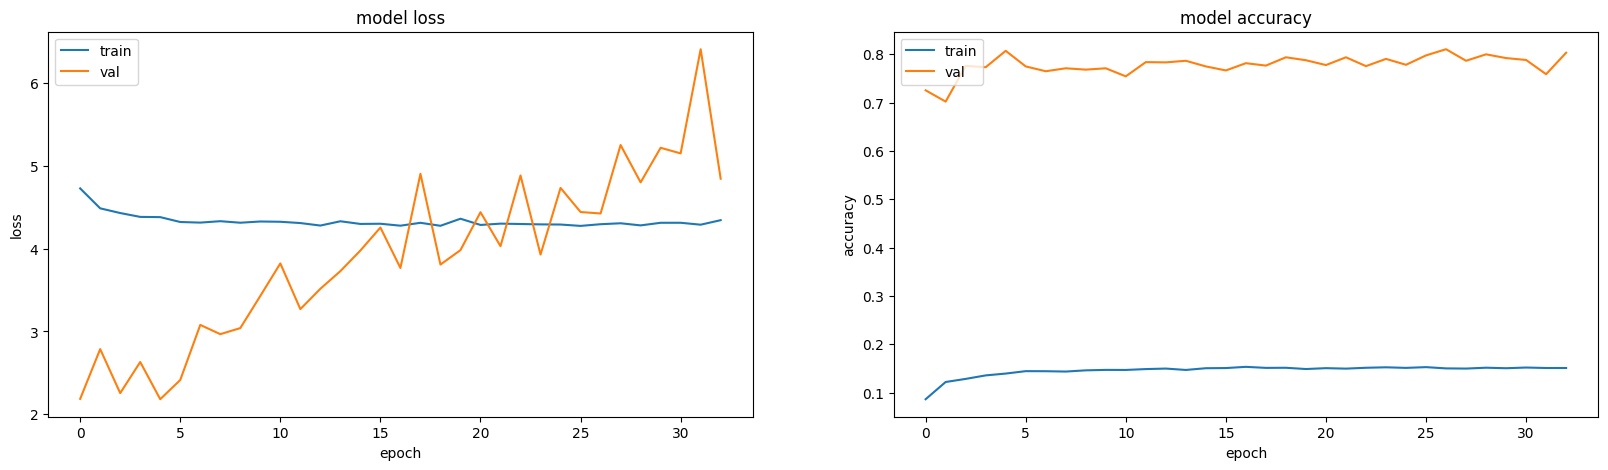

264/264 [==============================] - 117s 444ms/step - loss: 4.3444 - accuracy: 0.1512 - val_loss: 4.8457 - val_accuracy: 0.8033
Epoch 34/50
264/264 [==============================] - ETA: 0s - loss: 4.2959 - accuracy: 0.1534

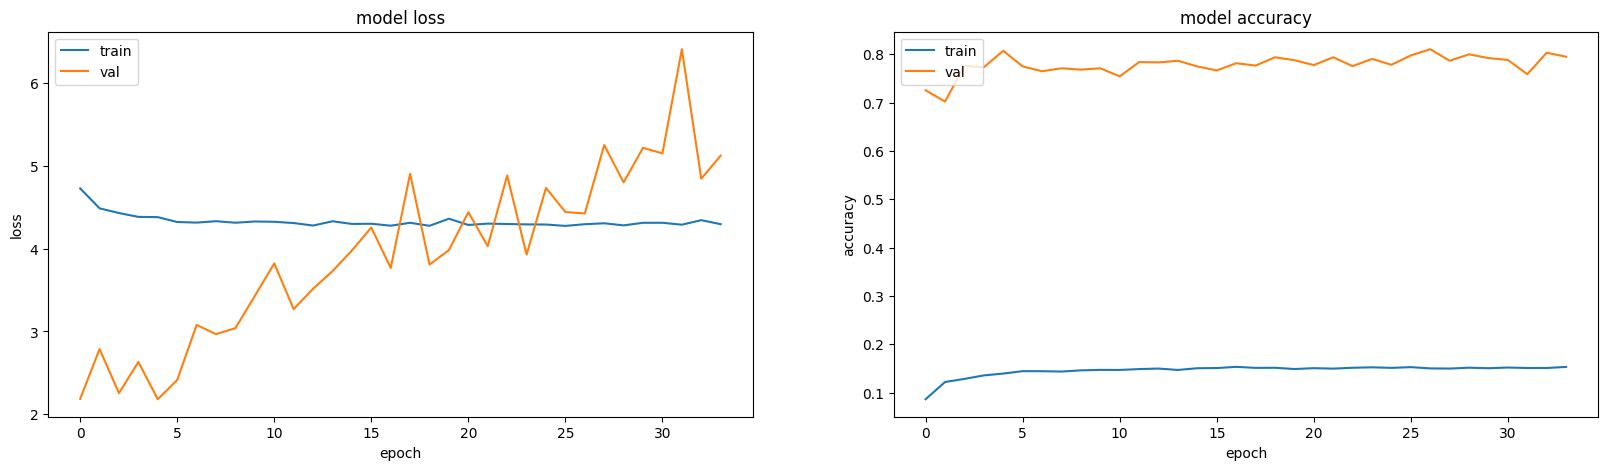

264/264 [==============================] - 117s 444ms/step - loss: 4.2959 - accuracy: 0.1534 - val_loss: 5.1239 - val_accuracy: 0.7950
Epoch 35/50
264/264 [==============================] - ETA: 0s - loss: 4.2816 - accuracy: 0.1550

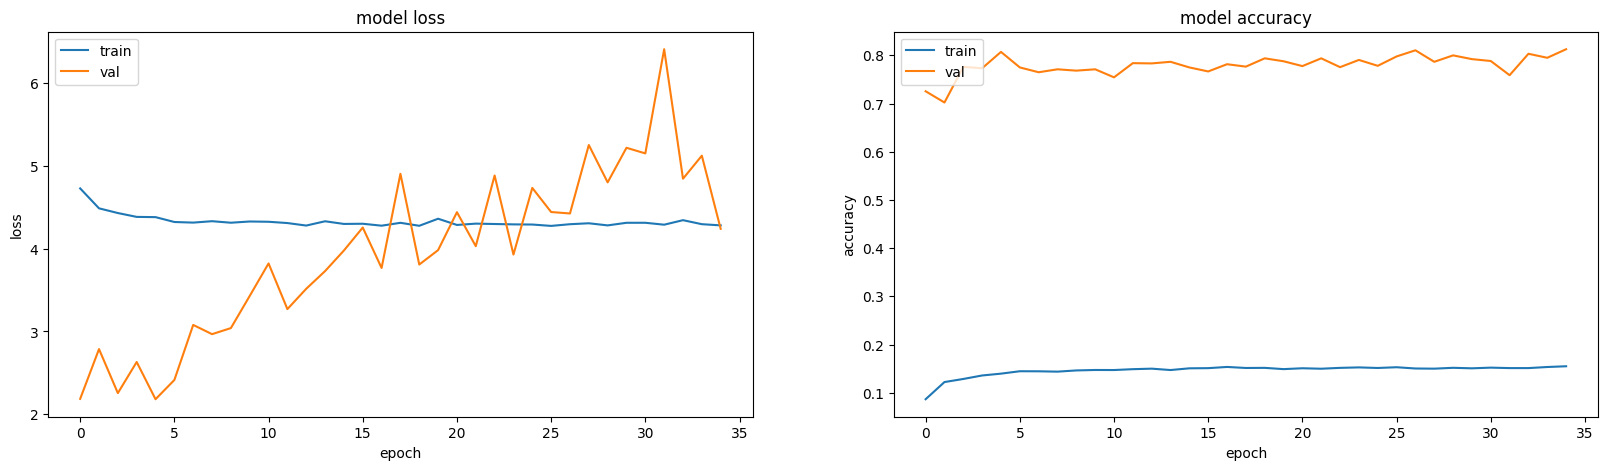

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/Multi/model_Multi_BEST/assets
264/264 [==============================] - 215s 817ms/step - loss: 4.2816 - accuracy: 0.1550 - val_loss: 4.2399 - val_accuracy: 0.8128
Epoch 36/50
264/264 [==============================] - ETA: 0s - loss: 4.2422 - accuracy: 0.1546

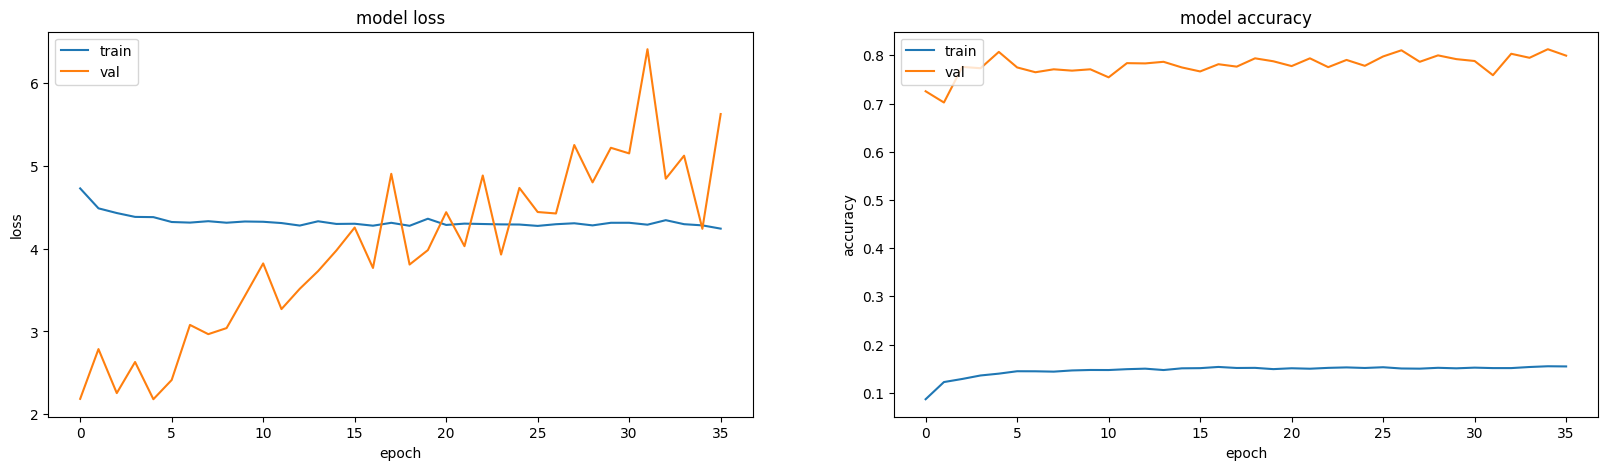

264/264 [==============================] - 117s 444ms/step - loss: 4.2422 - accuracy: 0.1546 - val_loss: 5.6272 - val_accuracy: 0.7994
Epoch 37/50
264/264 [==============================] - ETA: 0s - loss: 4.2539 - accuracy: 0.1557

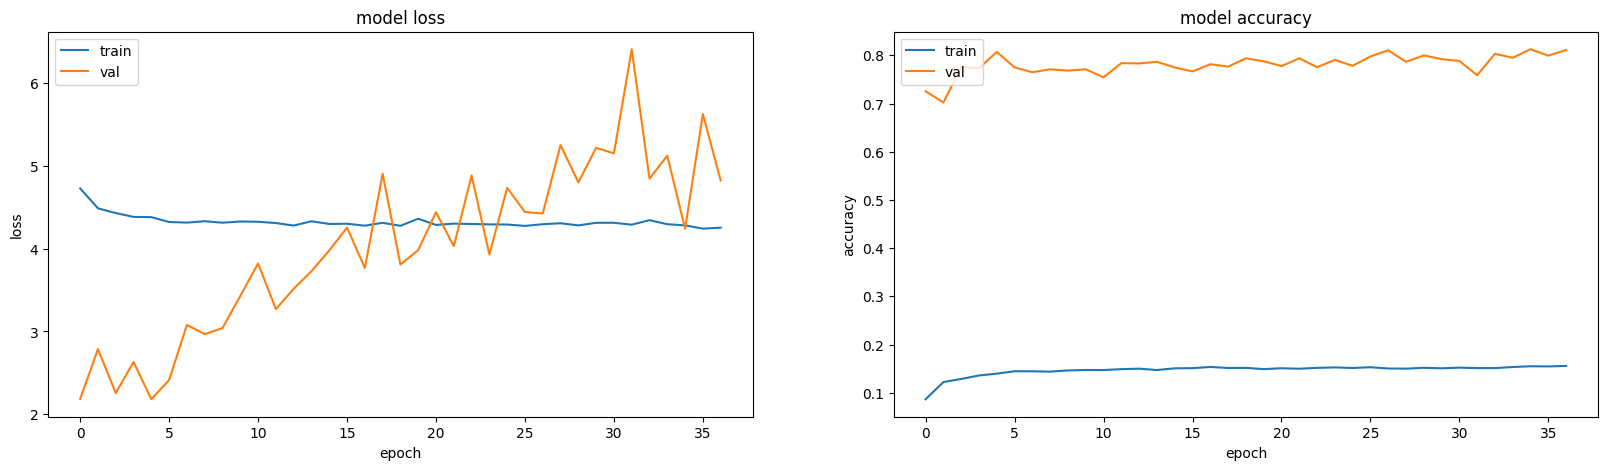

264/264 [==============================] - 117s 444ms/step - loss: 4.2539 - accuracy: 0.1557 - val_loss: 4.8253 - val_accuracy: 0.8111
Epoch 38/50
264/264 [==============================] - ETA: 0s - loss: 4.2626 - accuracy: 0.1554

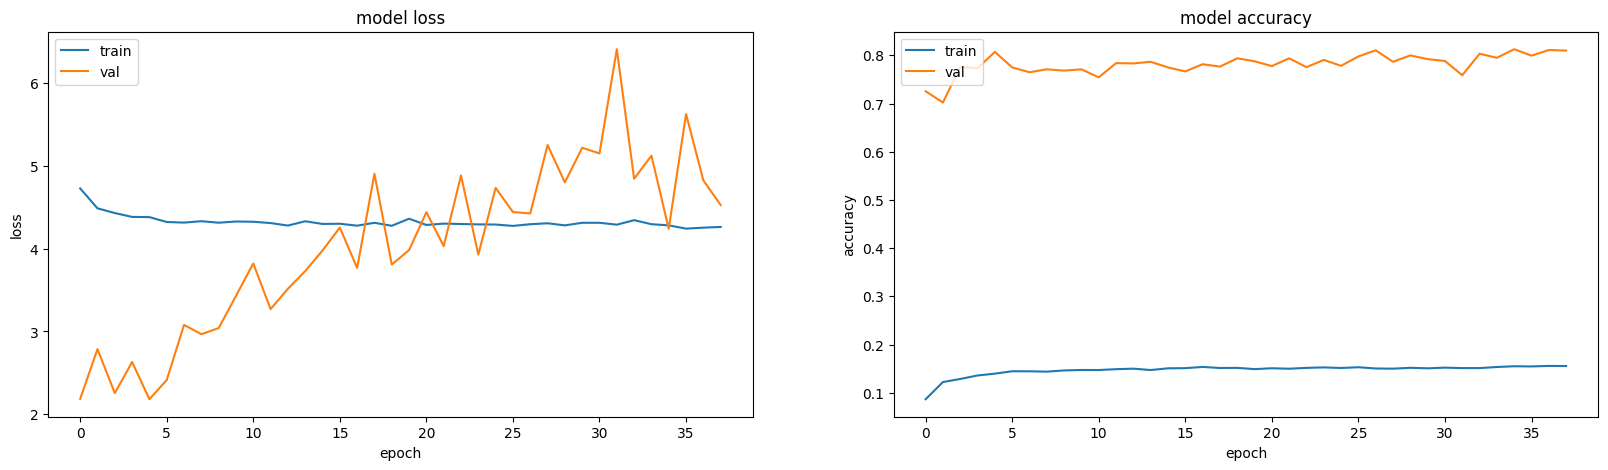

264/264 [==============================] - 117s 444ms/step - loss: 4.2626 - accuracy: 0.1554 - val_loss: 4.5272 - val_accuracy: 0.8100
Epoch 39/50
264/264 [==============================] - ETA: 0s - loss: 4.2851 - accuracy: 0.1542

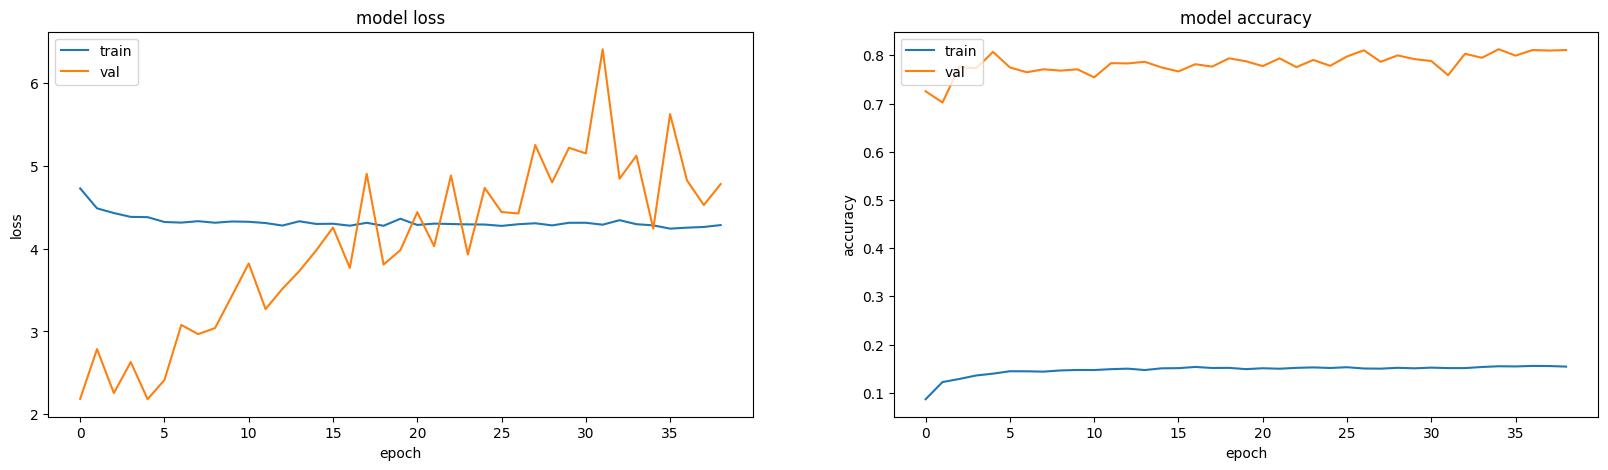

264/264 [==============================] - 117s 444ms/step - loss: 4.2851 - accuracy: 0.1542 - val_loss: 4.7808 - val_accuracy: 0.8111
Epoch 40/50
264/264 [==============================] - ETA: 0s - loss: 4.2677 - accuracy: 0.1559

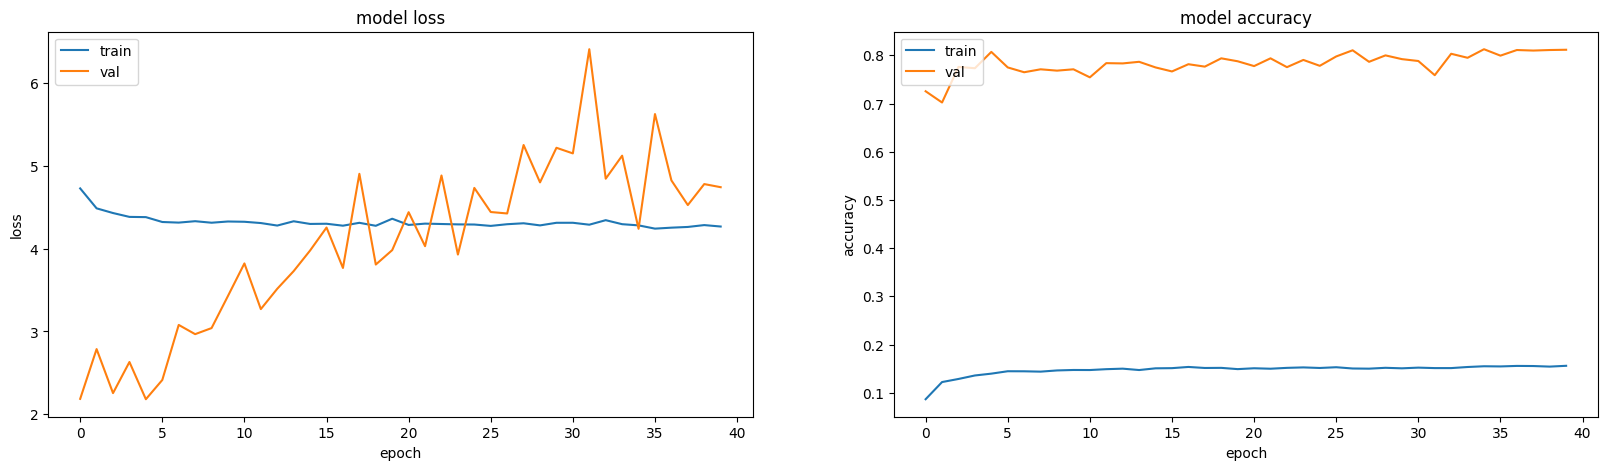

264/264 [==============================] - 117s 444ms/step - loss: 4.2677 - accuracy: 0.1559 - val_loss: 4.7430 - val_accuracy: 0.8117
Epoch 41/50
264/264 [==============================] - ETA: 0s - loss: 4.2808 - accuracy: 0.1550

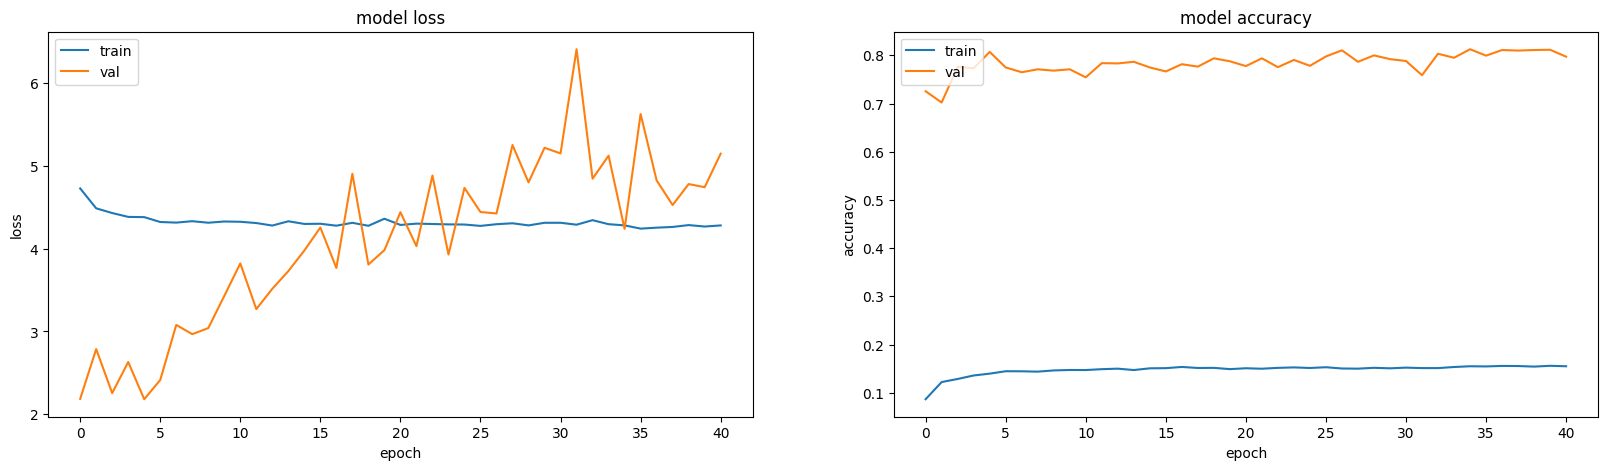

264/264 [==============================] - 117s 444ms/step - loss: 4.2808 - accuracy: 0.1550 - val_loss: 5.1479 - val_accuracy: 0.7972
Epoch 42/50
264/264 [==============================] - ETA: 0s - loss: 4.2734 - accuracy: 0.1533

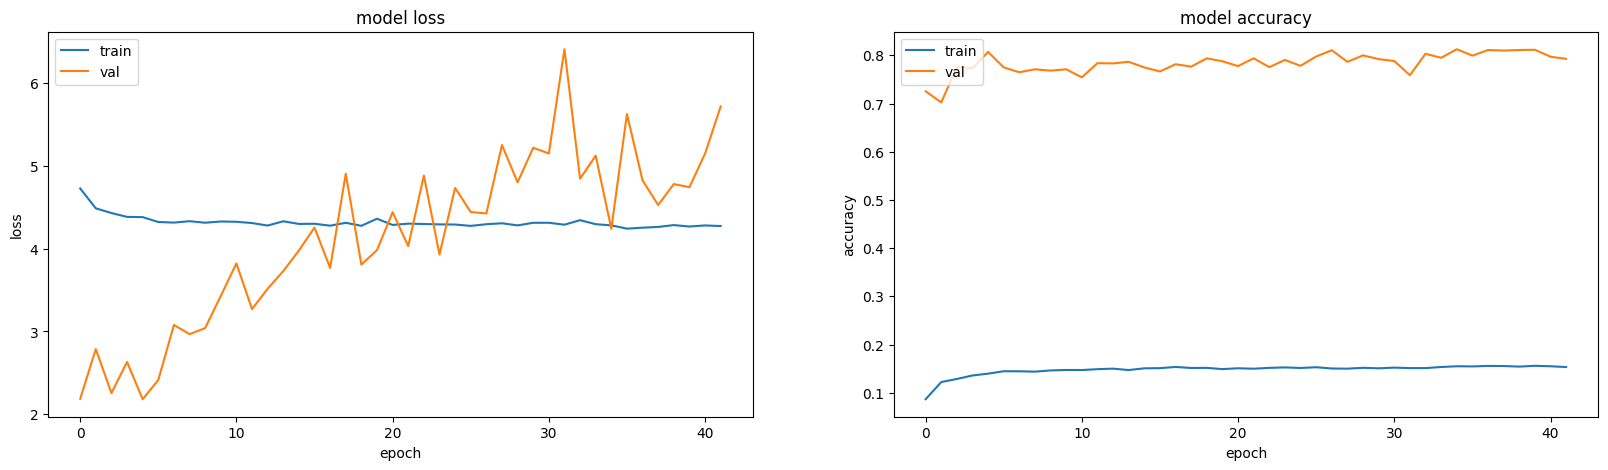

264/264 [==============================] - 117s 444ms/step - loss: 4.2734 - accuracy: 0.1533 - val_loss: 5.7192 - val_accuracy: 0.7928
Epoch 43/50
264/264 [==============================] - ETA: 0s - loss: 4.2684 - accuracy: 0.1554

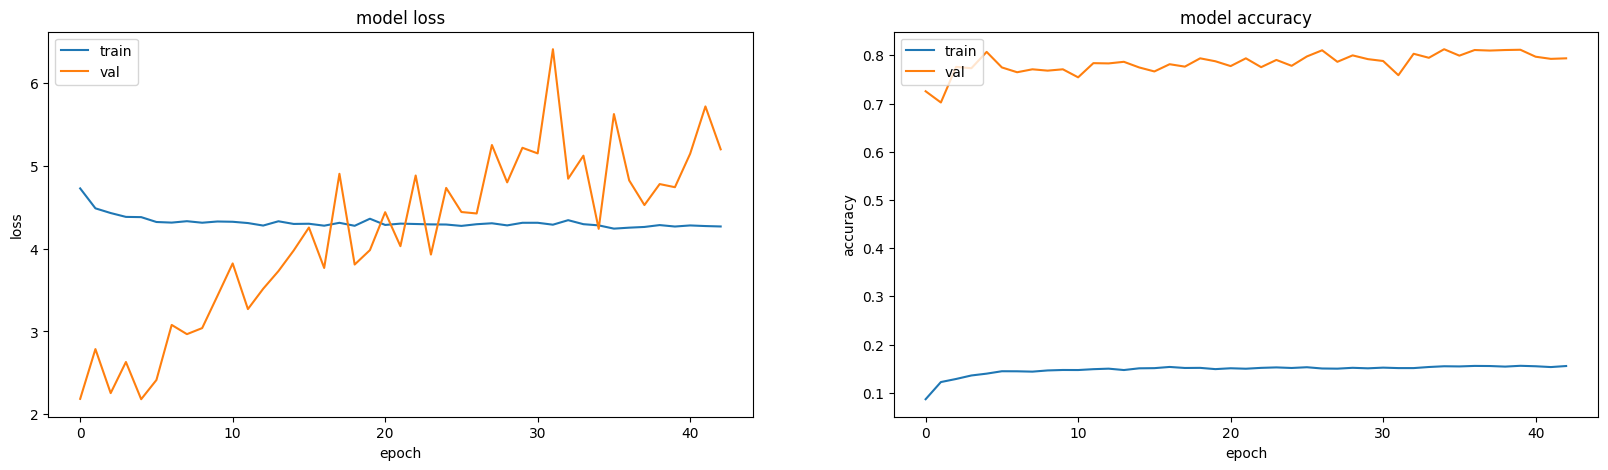

264/264 [==============================] - 117s 444ms/step - loss: 4.2684 - accuracy: 0.1554 - val_loss: 5.2008 - val_accuracy: 0.7939
Epoch 44/50
264/264 [==============================] - ETA: 0s - loss: 4.2827 - accuracy: 0.1547

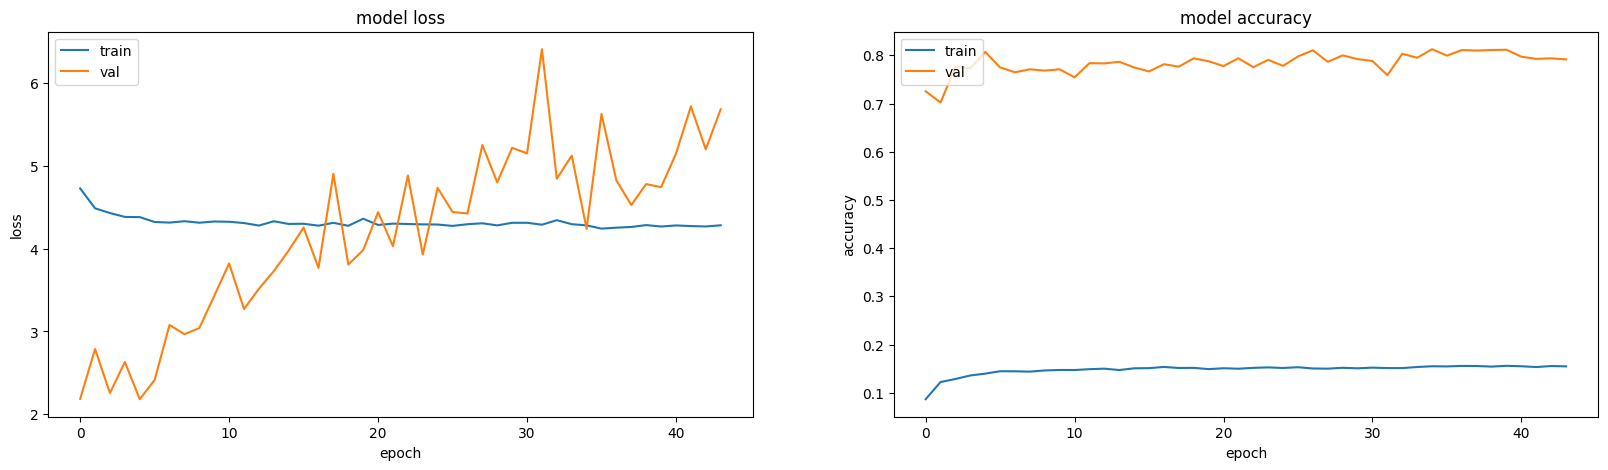

264/264 [==============================] - 117s 444ms/step - loss: 4.2827 - accuracy: 0.1547 - val_loss: 5.6842 - val_accuracy: 0.7917
Epoch 45/50
264/264 [==============================] - ETA: 0s - loss: 4.2980 - accuracy: 0.1552

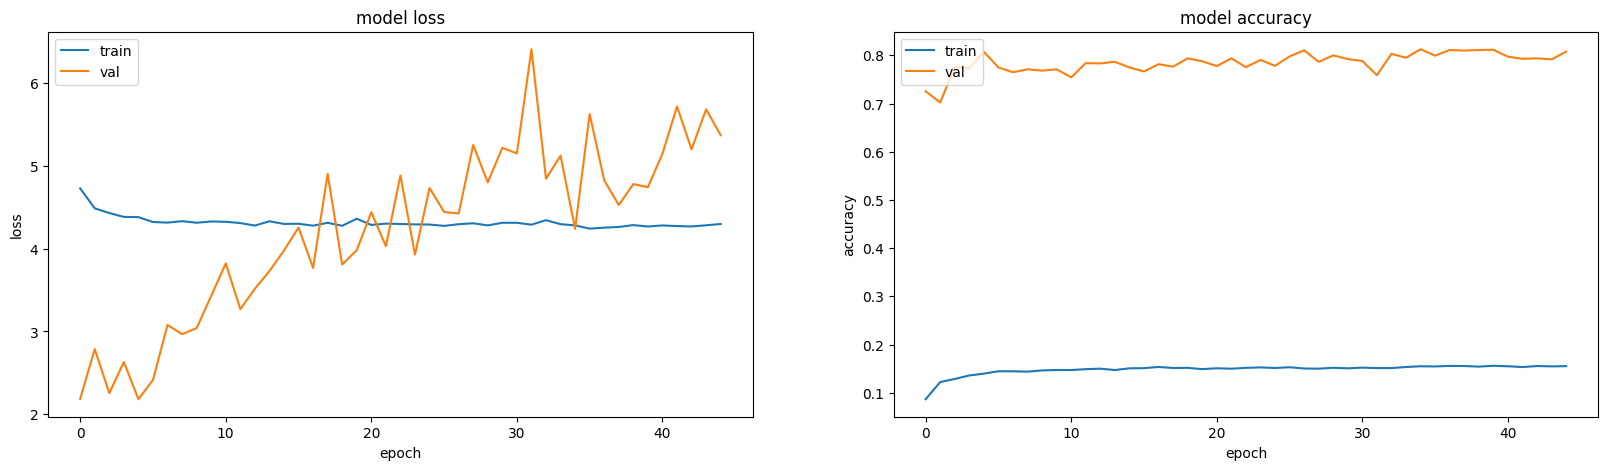

264/264 [==============================] - 117s 444ms/step - loss: 4.2980 - accuracy: 0.1552 - val_loss: 5.3716 - val_accuracy: 0.8078
Epoch 46/50
264/264 [==============================] - ETA: 0s - loss: 4.2545 - accuracy: 0.1571

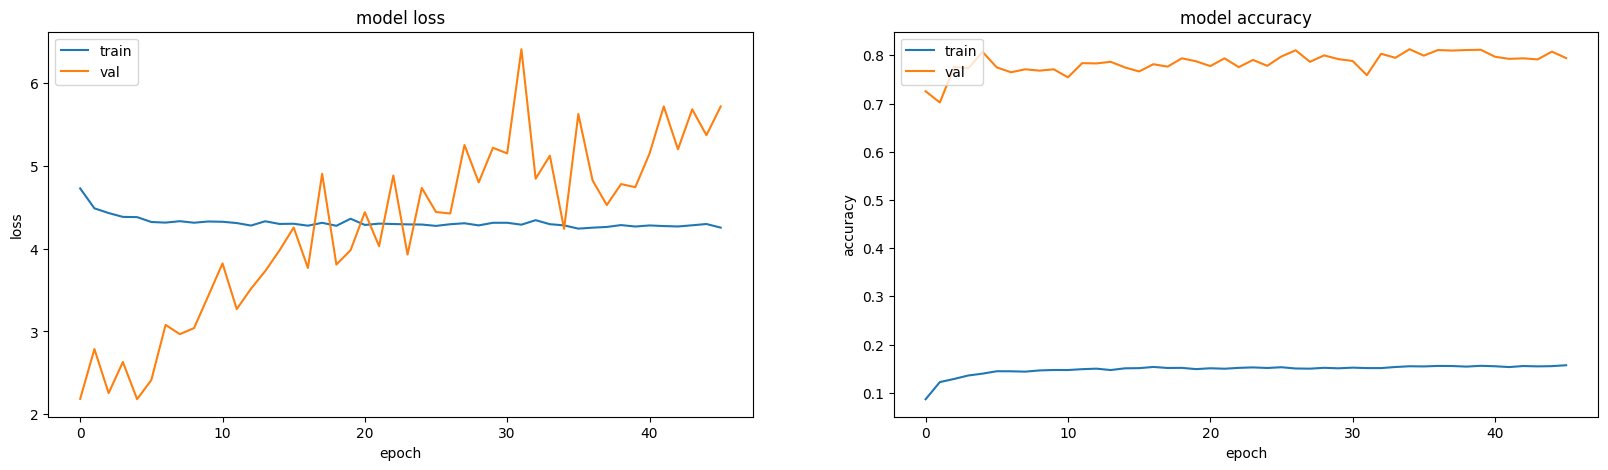

264/264 [==============================] - 117s 444ms/step - loss: 4.2545 - accuracy: 0.1571 - val_loss: 5.7186 - val_accuracy: 0.7944
Epoch 47/50
264/264 [==============================] - ETA: 0s - loss: 4.2762 - accuracy: 0.1576

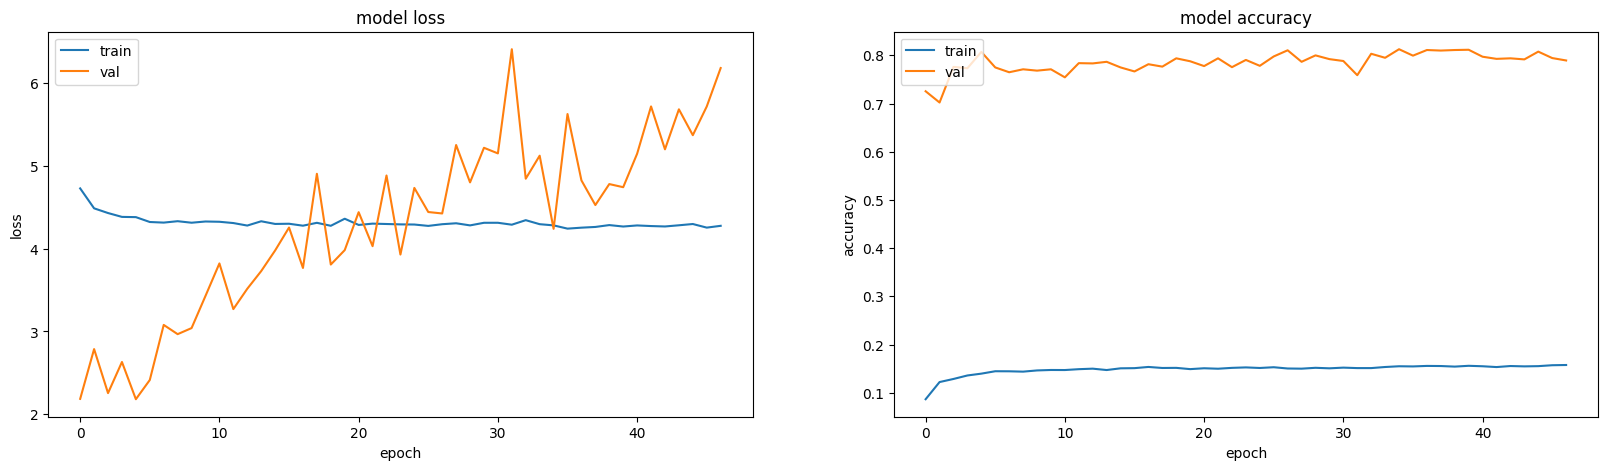

264/264 [==============================] - 117s 444ms/step - loss: 4.2762 - accuracy: 0.1576 - val_loss: 6.1832 - val_accuracy: 0.7894
Epoch 48/50
264/264 [==============================] - ETA: 0s - loss: 4.2898 - accuracy: 0.1538

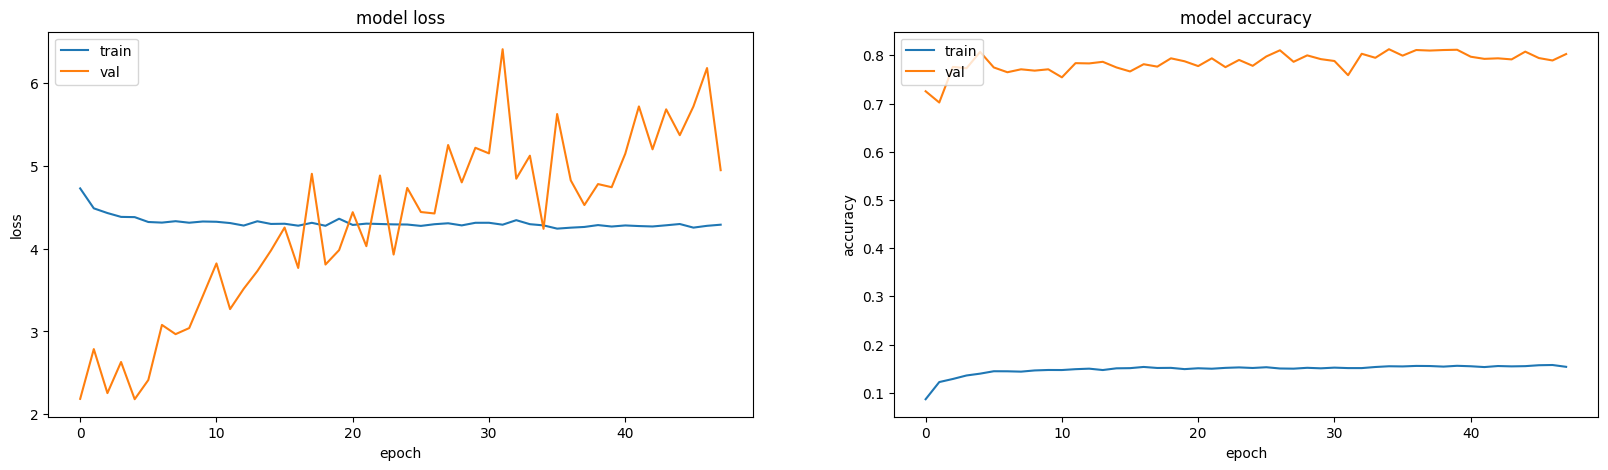

264/264 [==============================] - 117s 444ms/step - loss: 4.2898 - accuracy: 0.1538 - val_loss: 4.9486 - val_accuracy: 0.8028
Epoch 49/50
264/264 [==============================] - ETA: 0s - loss: 4.2886 - accuracy: 0.1541

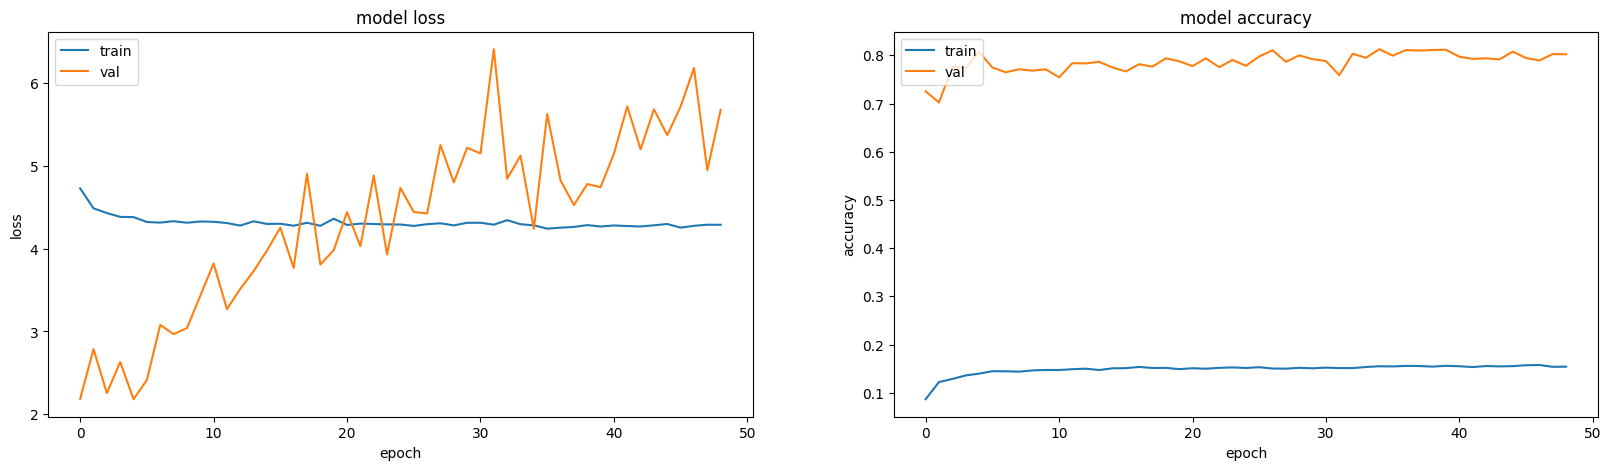

264/264 [==============================] - 117s 444ms/step - loss: 4.2886 - accuracy: 0.1541 - val_loss: 5.6775 - val_accuracy: 0.8022
Epoch 50/50
264/264 [==============================] - ETA: 0s - loss: 4.2748 - accuracy: 0.1539

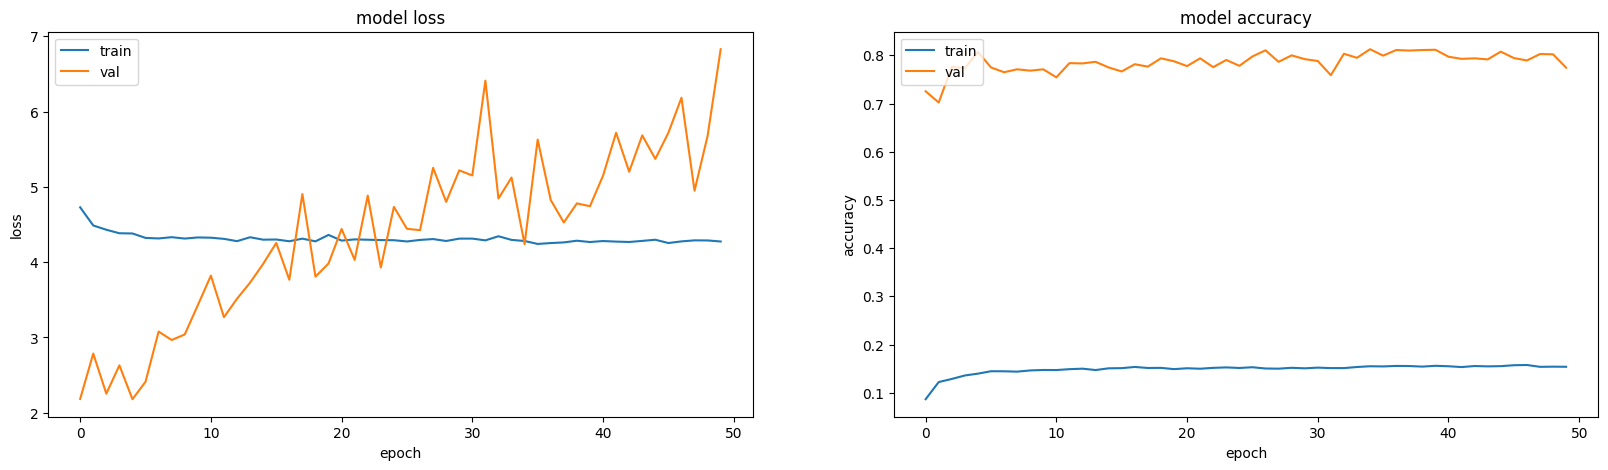

264/264 [==============================] - 117s 444ms/step - loss: 4.2748 - accuracy: 0.1539 - val_loss: 6.8277 - val_accuracy: 0.7744


In [26]:

for m in models_data[0:1]:
    rename_model('Multi')
    base_model_1 = models_data[0][1](
        include_top=False,
        weights='imagenet',
        input_shape= (IMG_SIZE, IMG_SIZE, NUM_CHANNELS)
    )
    base_model_2 = models_data[1][1](
        include_top=False,
        weights='imagenet',
        input_shape= (IMG_SIZE, IMG_SIZE, NUM_CHANNELS)
    )
    # base_model_3 = models_data[2][1](
    #     include_top=False,
    #     weights='imagenet',
    #     input_shape= (IMG_SIZE, IMG_SIZE, NUM_CHANNELS)
    # )
    # base_model_4 = models_data[3][1](
    #     include_top=False,
    #     weights='imagenet',
    #     input_shape= (IMG_SIZE, IMG_SIZE, NUM_CHANNELS)
    # )

    base_model_1.trainable = False
    base_model_2.trainable = False
    # base_model_3.trainable = False
    # base_model_4.trainable = False


    input = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, NUM_CHANNELS))
    pre_process_layer_1 = models_data[0][2](input, data_format=None)
    pre_process_layer_2 = models_data[1][2](input, data_format=None)
    # pre_process_layer_3 = models_data[2][2](input, data_format=None)
    # pre_process_layer_4 = models_data[3][2](input, data_format=None)

    layer_m1 = base_model_1(pre_process_layer_1, training=False)
    avg_1 = tf.keras.layers.GlobalAveragePooling2D()(layer_m1)
    
    layer_m2 = base_model_2(pre_process_layer_2, training=False)
    avg_2 = tf.keras.layers.GlobalAveragePooling2D()(layer_m2)

#     layer_m3 = base_model_3(pre_process_layer_3, training=False) 
#     avg_3 = tf.keras.layers.GlobalAveragePooling2D()(layer_m3)
    
#     layer_m4 = base_model_4(pre_process_layer_4, training=False) 
#     avg_4 = tf.keras.layers.GlobalAveragePooling2D()(layer_m4)
    
    #layer = tf.keras.layers.Concatenate()([avg_1, avg_2, avg_3, avg_4])
    layer = tf.keras.layers.Concatenate()([avg_1, avg_2])
    
    #layer = tf.keras.layers.GlobalAveragePooling2D()(layer)
    
    #layer = tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.01))(layer)
    layer = tf.keras.layers.Dense(512)(layer)
    layer = tf.keras.layers.Dropout(0.4)(layer)
    output = tf.keras.layers.Dense(NUM_CLASS, activation='softmax')(layer)

    model = tf.keras.Model(input, output)

    model.summary()
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )
    epochs = 50
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[real_time_callback()])


In [29]:
## Max validations
models_dir = os.listdir(os.path.join(os.getcwd(), 'd-1024-do-4','history'))
models_dir = [x for x in models_dir if x[-1] not in ['t', 's']]
df = [pd.read_csv(os.path.join(os.getcwd(), 'd-1024-do-4','history', x), index_col=0) for x in models_dir]
max_val = [x[x[' validation_accuracy'] == x[' validation_accuracy'].max()] for x in df]
[print(max_val[i], models_dir[i]) for i in range(len(models_dir))]

        accuracy   validation_accuracy     loss   validation_loss
epoch                                                            
77       0.94814              0.551667  1.06032         33.021217 model_Xception.csv
        accuracy   validation_accuracy     loss   validation_loss
epoch                                                            
42      0.949491              0.518333  0.28537          9.733346 model_EfficientNetB5.csv
        accuracy   validation_accuracy      loss   validation_loss
epoch                                                             
62      0.911141              0.461667  3.943418         89.294754 model_Inceptionv3.csv
        accuracy   validation_accuracy      loss   validation_loss
epoch                                                             
64      0.975473              0.623333  0.190377         10.607005 model_EfficientNetB0.csv
        accuracy   validation_accuracy      loss   validation_loss
epoch                                       

[None, None, None, None, None]

In [33]:
## Last model
models_dir = os.listdir(os.path.join(os.getcwd(), 'd-1024-do-4','history'))
models_dir = [x for x in models_dir if x[-1] not in ['t', 's']]
df = [pd.read_csv(os.path.join(os.getcwd(), 'd-1024-do-4','history', x), index_col=0) for x in models_dir]
max_val = [x.iloc[100,:] for x in df]
[print(max_val[i], models_dir[i]) for i in range(len(models_dir))]

 accuracy                0.964353
 validation_accuracy     0.523333
 loss                    0.851043
 validation_loss        44.856438
Name: 100, dtype: float64 model_Xception.csv
 accuracy                0.972043
 validation_accuracy     0.478333
 loss                    0.341304
 validation_loss        22.173059
Name: 100, dtype: float64 model_EfficientNetB5.csv
 accuracy                 0.945230
 validation_accuracy      0.420000
 loss                     3.579228
 validation_loss        149.472916
Name: 100, dtype: float64 model_Inceptionv3.csv
 accuracy                0.984099
 validation_accuracy     0.585000
 loss                    0.169474
 validation_loss        15.809146
Name: 100, dtype: float64 model_EfficientNetB0.csv
 accuracy                 0.920287
 validation_accuracy      0.471667
 loss                     5.464262
 validation_loss        133.533539
Name: 100, dtype: float64 model_VGG19.csv


[None, None, None, None, None]